In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.set_option('display.max_colwidth', None) # saco restricción para poder obtener el mensaje total de los tweets

In [2]:
tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [3]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


# Analisis de la columna Keyword

Antes que nada vemos la cantidad de elementos nulos que contiene la columna

In [4]:
keywords=tweets['keyword']
keywords.isnull().sum()

61

Calculamos la media de veracidad de estos elementos nulos, para un posterior analisis

In [5]:
keywords_nulas=tweets.loc[(tweets['keyword'].isnull()),:]
keywords_nulas['target'].mean()

0.6885245901639344

Armo un dataframe auxiliar en el que no haya elementos nulos en la columna keyword, para evitar errores en un posterior filtrado

In [6]:
tweets_without_na=tweets.copy()
tweets_without_na.dropna(inplace=True,subset=['keyword'])

Obtenemos informacion acerca de la cantidad tweets por algunas keywords, y la cantidad total

In [7]:
keywords.value_counts()

fatalities               45
deluge                   42
armageddon               42
harm                     41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [8]:
keywords.value_counts().mean()

34.171945701357465

### Analisis de la distribucion de variables

Text(0.5, 1.0, 'Distribucion de la longitud de las keywords')

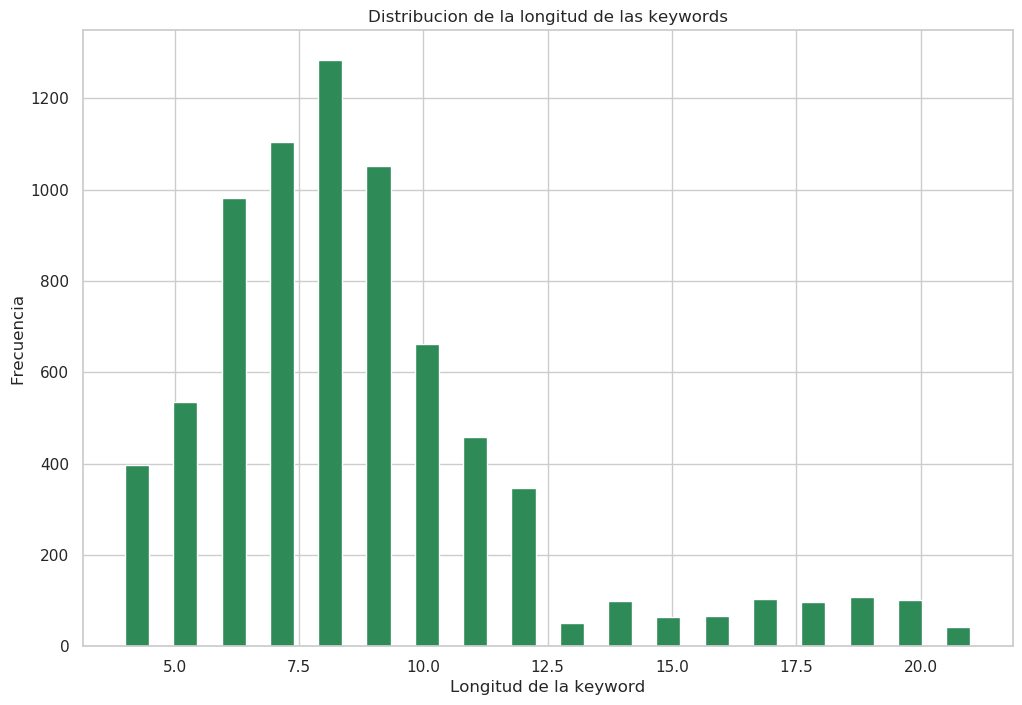

In [9]:
keywords_largo=tweets.copy()
keywords_largo['length']=keywords_largo['keyword'].str.len()
keywords_largo['length'].plot(kind='hist', bins=35,figsize=(12,8),color='seagreen')
plt.xlabel('Longitud de la keyword')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la longitud de las keywords')

In [10]:
keywords_largo['length'].mean()

8.737155720338983

Text(0.5, 1.0, 'Distribucion de keywords por tweets')

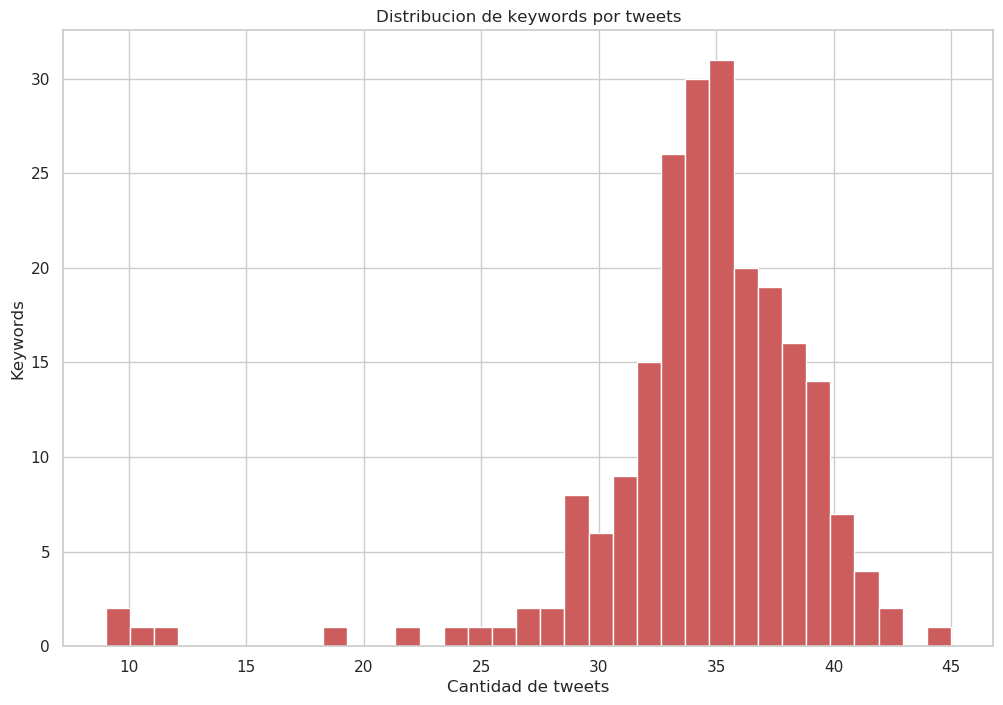

In [11]:
keyword_grouped=tweets.groupby(['keyword']).agg({'target':['mean','count']})
keyword_grouped[('target','count')].plot(kind='hist', bins=35,figsize=(12,8),color='indianred')
plt.xlabel('Cantidad de tweets')
plt.ylabel('Keywords')
plt.title('Distribucion de keywords por tweets')

### Relacion con la veracidad

¿Hay alguna relacion entre el largo de la keyword y la veracidad? Para analizarlo se separo en grupos el dataframe por longitud de la keyword, posteriormente se calculo la media de las longitudes. Y por ultimo se hizo un scatter plot para ver si hay relacion alguna

In [12]:
keywords_largo_verdaderas=keywords_largo.loc[(keywords_largo['target']==1),:]
keywords_largo_falsas=keywords_largo.loc[(keywords_largo['target']==0),:]

groups_by_length_false=keywords_largo_falsas.groupby(['length']).agg({'target':'count'}) 
groups_by_length_true=keywords_largo_verdaderas.groupby(['length']).agg({'target':'count'}) 

groups_by_length_false.reset_index(inplace=True)
groups_by_length_true.reset_index(inplace=True)

groups_by_length_false.set_index('length', inplace=True)
groups_by_length_true.set_index('length', inplace=True)

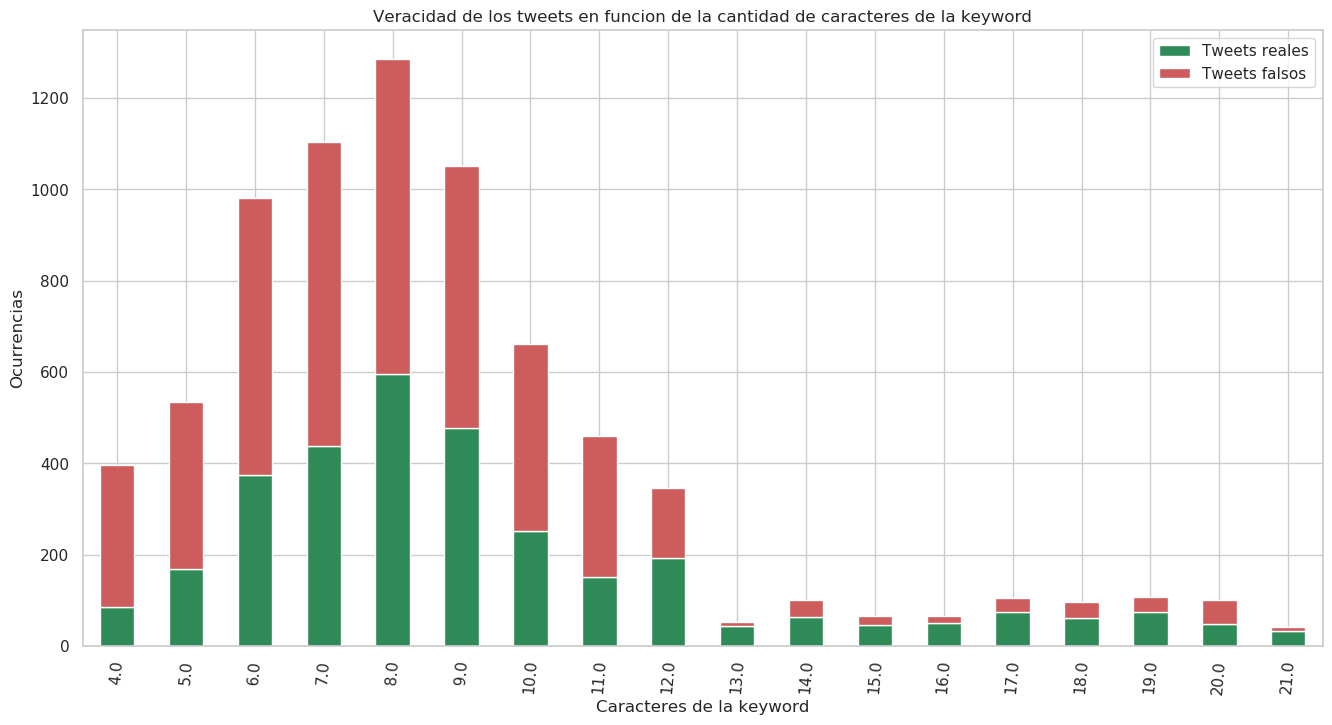

In [13]:
groups_by_length_true['target'].plot(kind='bar',figsize=(16,8),rot=85,title=\
        'Veracidad de los tweets en funcion de la cantidad de caracteres de la keyword',color='Seagreen');
groups_by_length_false['target'].plot(kind='bar',figsize=(16,8),\
        bottom=groups_by_length_true['target'],rot=85,color='Indianred');
ax=plt.gca()
ax.set_ylabel('Ocurrencias')
ax.set_xlabel('Caracteres de la keyword');
ax.legend(labels=['Tweets reales', 'Tweets falsos'])

Calculamos la media de veracidad de la longitud mas frecuente

In [14]:
groups_by_length=keywords_largo.groupby(['length']).agg({'target':'mean'}) 
groups_by_length.iloc[4,0]

0.46303501945525294

Multiplicamos por 100 la columna mean, para obtener un porcentaje caracteristico

In [15]:
keyword_grouped[('target','mean')] = keyword_grouped[('target','mean')].apply(lambda x: x*100)

Buscamos las 10 keywords con menor veracidad 

Text(0, 0.5, 'Keywords')

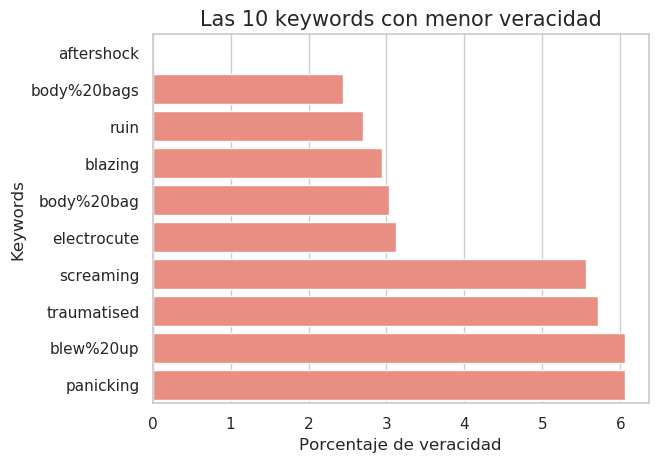

In [16]:
top_10_falses=keyword_grouped[('target','mean')].nsmallest(10)
df_10_falses=top_10_falses.to_frame()
g = sns.barplot(x=df_10_falses[('target','mean')], y=df_10_falses.index, orient='h', color='salmon')
g.set_title("Las 10 keywords con menor veracidad", fontsize=15)
g.set_xlabel("Porcentaje de veracidad", fontsize=12)
g.set_ylabel("Keywords", fontsize=12)

Analizamos los textos relacionados a la keyword 'aftershock'

In [17]:
tweets_without_na[tweets_without_na['keyword'].str.contains("aftershock")]

,id,keyword,location,text,target
102,146,aftershock,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0
103,149,aftershock,304,'The man who can drive himself further once the effort gets painful is the man who will win.' \nRoger Bannister,0
104,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/weQPesENku,0
105,153,aftershock,304,'There is no victory at bargain basement prices.' Dwight David Eisenhower,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz,0
107,157,aftershock,304,'Nobody remembers who came in second.' Charles Schulz,0
108,158,aftershock,Instagram - @heyimginog,@afterShock_DeLo im speaking from someone that is using a scuf on xb1 most of them people will end up getting on for ps also.,0
109,159,aftershock,304,'The harder the conflict the more glorious the triumph.' Thomas Paine,0
110,160,aftershock,NaN,#GrowingUpSpoiled going clay pigeon shooting and crying because of the 'aftershock',0
111,161,aftershock,Somewhere Only We Know ?,So i guess no one actually wants any free Aftershock TC.....,0


Buscamos las keywords con mayor porcentaje de veracidad

Text(0, 0.5, 'Keywords')

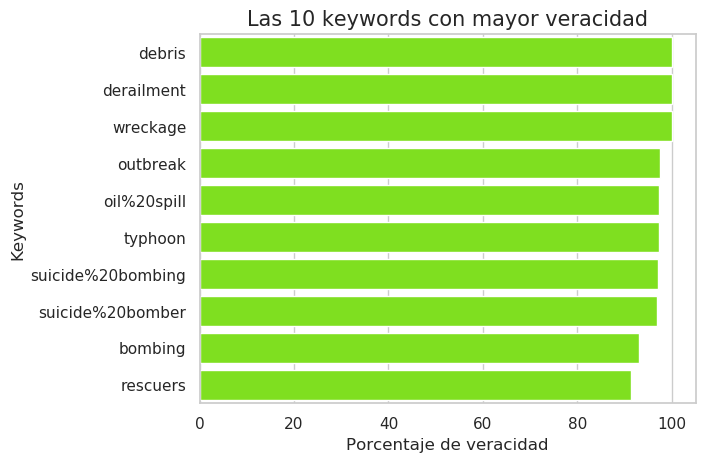

In [18]:
top_10_reals=keyword_grouped[('target','mean')].nlargest(10)
df_10_reals=top_10_reals.to_frame()

g = sns.barplot(x=df_10_reals[('target','mean')], y=df_10_reals.index, orient='h', color='chartreuse')
g.set_title("Las 10 keywords con mayor veracidad", fontsize=15)
g.set_xlabel("Porcentaje de veracidad", fontsize=12)
g.set_ylabel("Keywords", fontsize=12)

Calculamos la media de los tweets con keyword 'quarantine', para una posterior comparacion

In [19]:
tweets_without_na[tweets_without_na['keyword'].str.contains("quarantine")].mean()

id        7846.281690
target       0.267606
dtype: float64

# Ubicacion de un tweet

La idea es analizar para ver si podemos encontrar alguna relacion entre la veracidad de los tweets y la ubicacion de los mismos. Primero revisamos como es el estilo de los datos y cuales son los mas frecuentes.

In [20]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


Armo un plot con el top 50 mas frecuentes ubicaciones para visualizar mejor la distribucion de ellas.

Text(0.5, 1.0, 'Frecuencias de cada ubicacion')

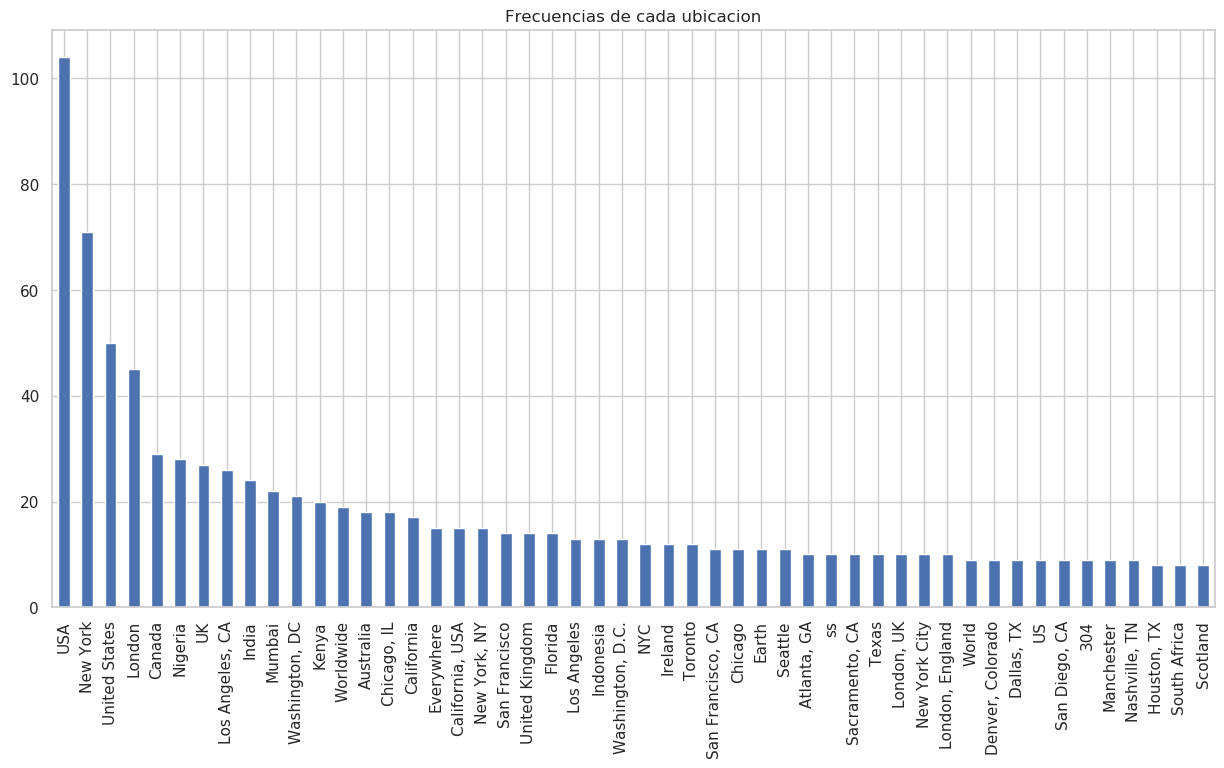

In [21]:
location_counts = tweets['location'].value_counts(dropna=True)
chart = location_counts.head(50).plot.bar(x='Ubicacion', y='Frecuencia', figsize=(15,7.5))
chart.set_title('Frecuencias de cada ubicacion')

¿Estara relacionada la veracidad de los tweets y la frecuencia de la ubicacion? Vamos a analizarlo agregando 2 columnas nuevas al dataframe. Estas nos van a mostrar la cantidad de tweets verdaderos y de tweets falsos que contiene cada lugar de ubicacion. 

In [22]:
location_df = pd.DataFrame([location_counts]).transpose()
location_df.columns = ['frequency']
location_df.loc[:, 'real_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].sum())
location_df.loc[:, 'fake_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].apply(lambda y: 1 - y).sum())

Tomamos estas columnas nuevas y graficamos los datos para las 50 primeras.

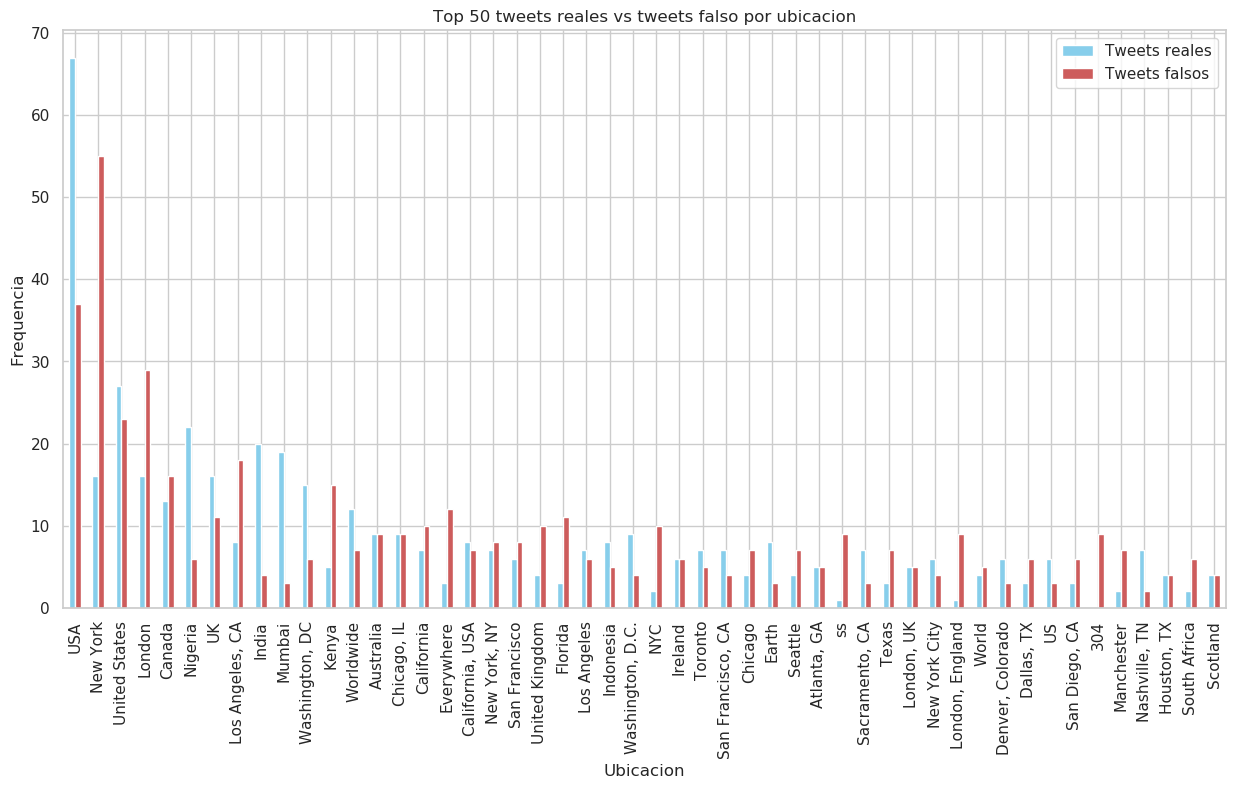

In [23]:
plot_df = pd.DataFrame({"Tweets reales": location_df['real_tweet_count'].head(50), "Tweets falsos": location_df['fake_tweet_count'].head(50)})
ax = plot_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Top 50 tweets reales vs tweets falso por ubicacion")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

Como puede verse a primera vista no creo que podamos marcar ningun tipo de relacion entre las ubicaciones mas comunes y la veracidad de los tweets. Aun asi pareceria que las ubicacones con paises tienen un mayor porcentaje de tweets verdaderos. Separo las ubicaciones por paises.

In [24]:
countries = {
    'USA',
    'United States',
    'UK',
    'Canada',
    'Indonesia',
    'Kenya',
    'Nigeria',
    'US',
    'Scotland',
    'Ireland',
    'Australia',
    'United Kingdom',
    'South Africa'
}
countries_available = [x for x in location_counts.index.tolist() if x in countries]
country_df = pd.DataFrame()
for c in countries_available:
    country_df[c] = pd.Series(dtype=object)
country_df = country_df.transpose()
country_df.loc[:, 'Tweets reales'] = country_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].sum())
country_df.loc[:, 'Tweets falsos'] = country_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].apply(lambda y: 1 - y).sum())


Tomamos estos datos por pais y graficamos

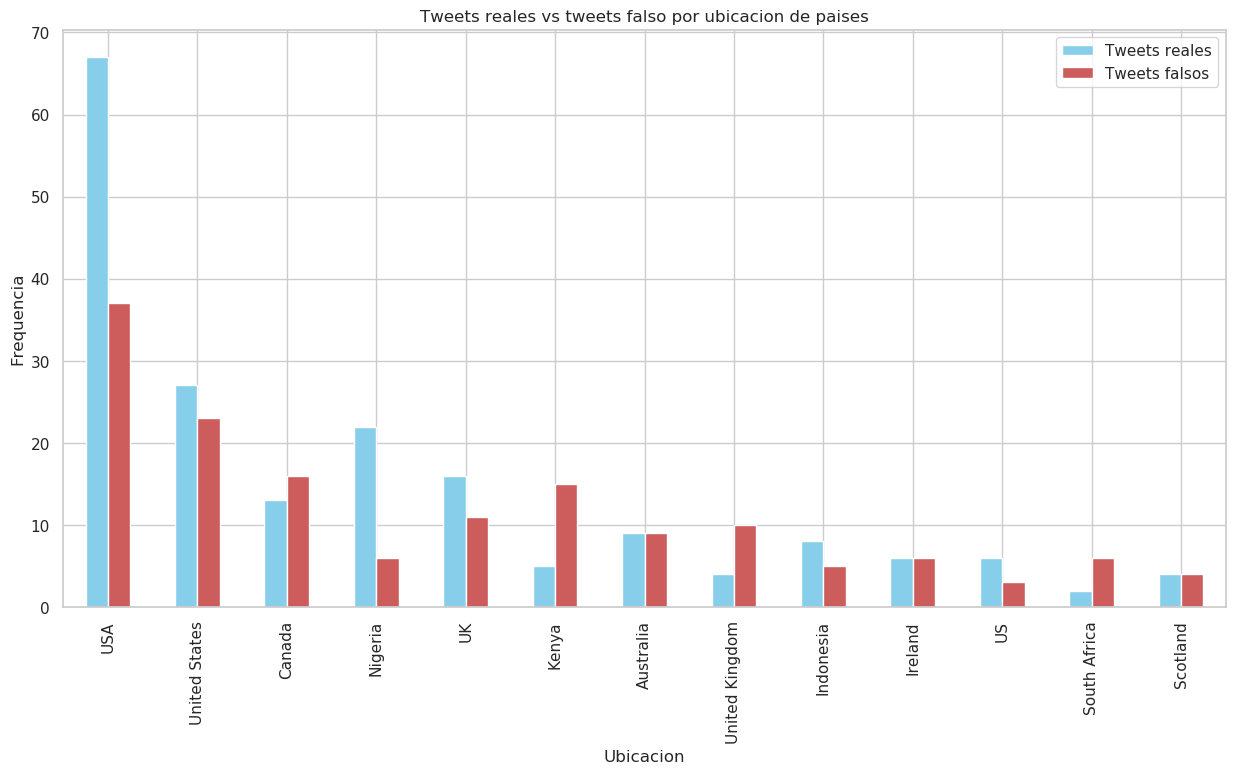

In [25]:
ax = country_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Tweets reales vs tweets falso por ubicacion de paises")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

En conclusion si bien pareceria que hay un mayor % de veracidad cuando la ubicacion se trata de un pais, no hay ninguna trend muy notable a la que podamos señalar.

### Ubicaciones invalidas

Ahora si, ¿Que ocurre con las ubicaciones que no representan ninguna ciudad? Voy a filtrar por ubicaciones que contengan caracteres invalidos como \#, ?, numeros y analizo la veracidad de esos tweets. 

In [26]:
invalid_characters_regex = '#|\$|\|%|\?|!|/|;|@|\+|\*|\d'
tweets_with_invalid_locs = tweets[tweets.location.notna() & tweets.location.str.match(invalid_characters_regex)]
tweets_with_invalid_locs

,id,keyword,location,text,target
103,149,aftershock,304,'The man who can drive himself further once the effort gets painful is the man who will win.' \nRoger Bannister,0
105,153,aftershock,304,'There is no victory at bargain basement prices.' Dwight David Eisenhower,0
107,157,aftershock,304,'Nobody remembers who came in second.' Charles Schulz,0
109,159,aftershock,304,'The harder the conflict the more glorious the triumph.' Thomas Paine,0
125,180,aftershock,304,Sometimes you face difficulties not because you're doing something wrong but because you're doing something right. - Joel Osteen,0
...,...,...,...,...,...
7460,10676,wounds,?Gangsta OC / MV RP; 18+.?,@IcyMagistrate ÛÓher upper armÛÒ those /friggin/ icicle projectilesÛÒ and leg from various other wounds the girl looks like a miniature moreÛÓ,1
7471,10688,wreck,1/10 Taron squad,Season 3 of New Girl was such a emotional train wreck I just wanted to cry laugh and eat a lot of ice cream,0
7499,10727,wreck,709?,I still need to finish the lover but I'm watching this other drama for 8 hours now and I'm an emotional wreck so the lover needs to wait,0
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0


Casi el 70% de los tweets que tienen uno de estos caracteres en la ubicacion es falso. Veamos como es la distribucion de caracteres invalidos segun la veracidad.

In [27]:
pattern = re.compile(invalid_characters_regex)
fake_and_real_tweets_with_count = tweets_with_invalid_locs.copy()
fake_and_real_tweets_with_count['invalid_counts'] = tweets_with_invalid_locs['location'].apply(
    lambda x: len(re.findall(pattern, x))
)
fake_and_real_tweets_with_count

,id,keyword,location,text,target,invalid_counts
103,149,aftershock,304,'The man who can drive himself further once the effort gets painful is the man who will win.' \nRoger Bannister,0,3
105,153,aftershock,304,'There is no victory at bargain basement prices.' Dwight David Eisenhower,0,3
107,157,aftershock,304,'Nobody remembers who came in second.' Charles Schulz,0,3
109,159,aftershock,304,'The harder the conflict the more glorious the triumph.' Thomas Paine,0,3
125,180,aftershock,304,Sometimes you face difficulties not because you're doing something wrong but because you're doing something right. - Joel Osteen,0,3
...,...,...,...,...,...,...
7460,10676,wounds,?Gangsta OC / MV RP; 18+.?,@IcyMagistrate ÛÓher upper armÛÒ those /friggin/ icicle projectilesÛÒ and leg from various other wounds the girl looks like a miniature moreÛÓ,1,7
7471,10688,wreck,1/10 Taron squad,Season 3 of New Girl was such a emotional train wreck I just wanted to cry laugh and eat a lot of ice cream,0,4
7499,10727,wreck,709?,I still need to finish the lover but I'm watching this other drama for 8 hours now and I'm an emotional wreck so the lover needs to wait,0,4
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0,1


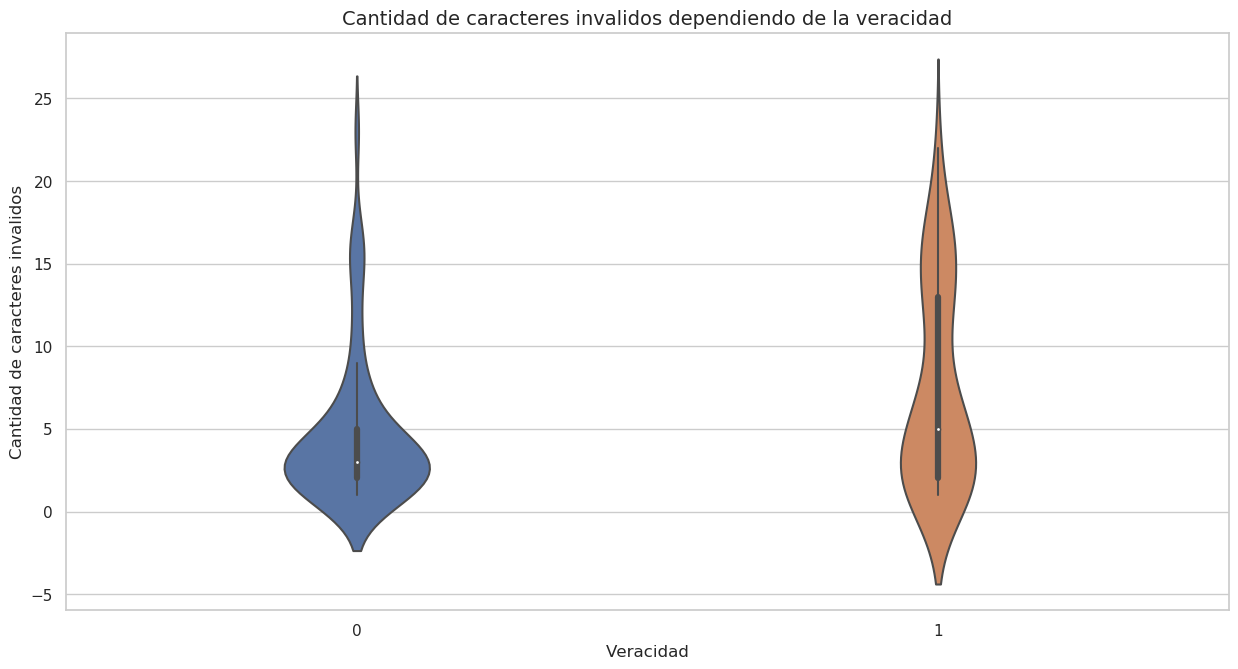

In [28]:
plt.figure(figsize=(15,7.5))
ax = sns.violinplot(y=fake_and_real_tweets_with_count.invalid_counts, x=fake_and_real_tweets_with_count.target, showmeans=True, width=0.25)
ax.set_title('Cantidad de caracteres invalidos dependiendo de la veracidad', fontsize=14)
ax.set_ylabel('Cantidad de caracteres invalidos')
ax.set_xlabel('Veracidad')
plt.show()

Como podemos ver en el grafico, pareceria que los tweets verdaderos tienen mas de estos caracteres invalidos, mientras que los tweets falsos suelen tener una cantidad acotada [2,5] de caracteres invalidos

In [29]:
fake_and_real_tweets_with_invalid = fake_and_real_tweets_with_count.groupby('target').agg({'target': lambda x: x.size})

Graficamos para ver el porcentaje falso de tweets.

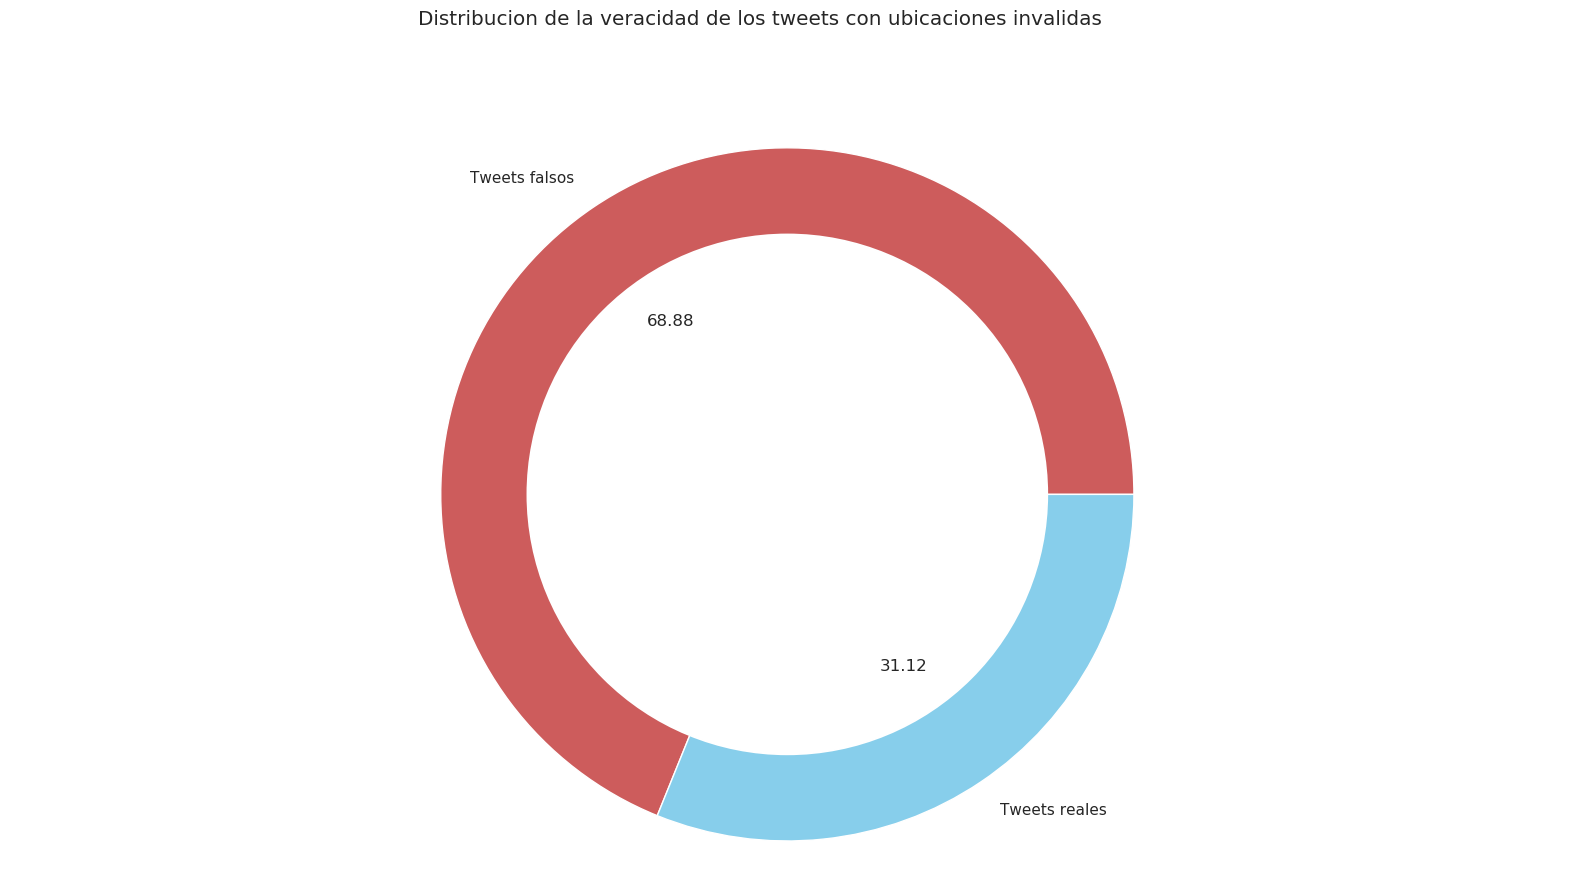

In [30]:
plt.figure(figsize=(15, 7.5))
plt.pie(fake_and_real_tweets_with_invalid['target'],colors=['IndianRed', 'SkyBlue'], labels=['Tweets falsos','Tweets reales'], autopct='%.2f')

centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(20,10)
fig.suptitle('Distribucion de la veracidad de los tweets con ubicaciones invalidas')

plt.axis('equal')
plt.show()

### Longitud de la ubicacion y la veracidad

Quiero analizar si hay alguna relacion entre la cantidad de caracteres que tienen las ubicaciones y la veracidad de los tweets. Para esto creo una columna nueva que guarde el length de la ubicacion. Las ubicaciones NaN las tomamos como 0.

In [31]:
tweets_location_length = tweets.copy()
tweets_location_length['location_length'] = [(0 if isinstance(t, float) else len(t)) for t in tweets_location_length['location']]
tweets_location_length

,id,keyword,location,text,target,location_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,0


¿Como es la distribucion de las longitudes de la ubicacion?

In [32]:
location_plot = tweets_location_length.where(lambda x: x['location_length'] > 0).dropna()

Remuevo las columnas que no tienen ubicacion y grafico

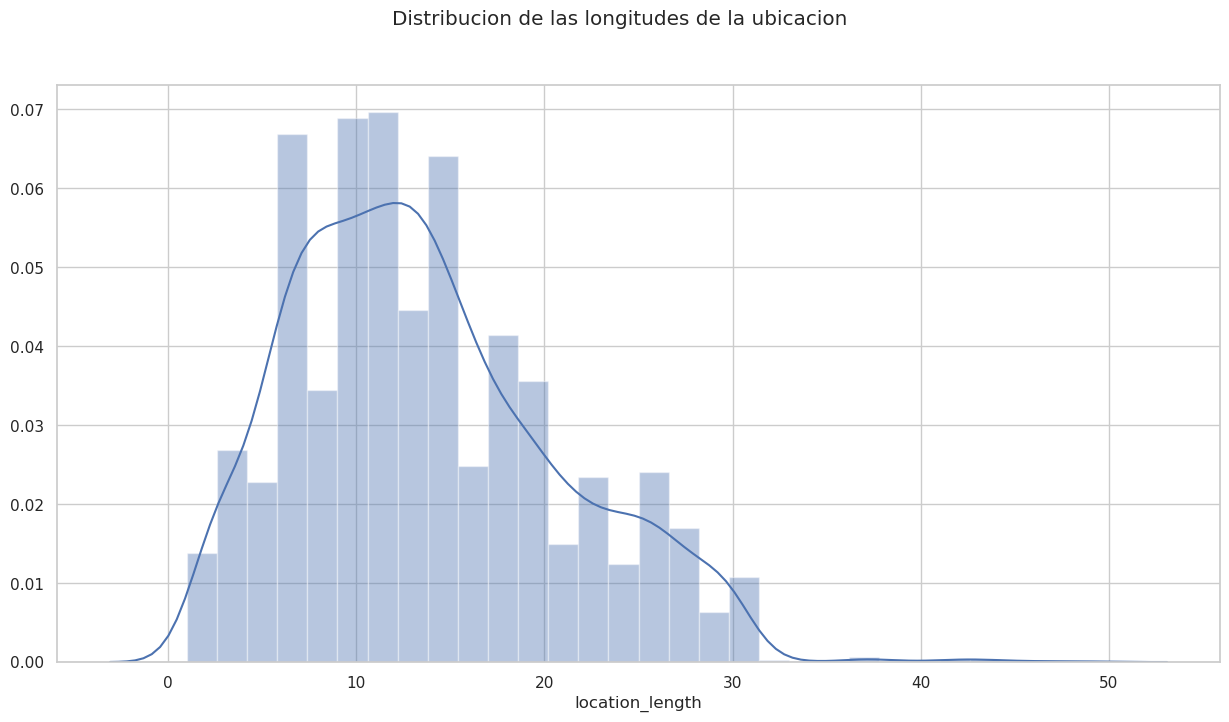

In [33]:
plt.figure(figsize=(15,7.5))
axes = sns.distplot(location_plot.location_length, bins = 30)
plt.suptitle('Distribucion de las longitudes de la ubicacion')
plt.show()

Podemos ver que la longitudes rondan por su mayoria en el interval [5, 20]

Ahora analizamos las longitudes dividiendolas por categoria, reales o no (target 1 o 0)

In [34]:
location_plot.groupby('target').agg({'location_length': ['max', 'min', 'mean']})

location_length                
                   max  min       mean
target                                
0.0               47.0  1.0  13.636616
1.0               49.0  1.0  13.657559

A simple vista pareceria que la longitud de las ubicaciones de los tweets reales y los falsos tienden a ser muy similares y que no se puede asumir ninguna relacion entre ellos.

Armo un grafico para visualizar la relacion de las longitudes.

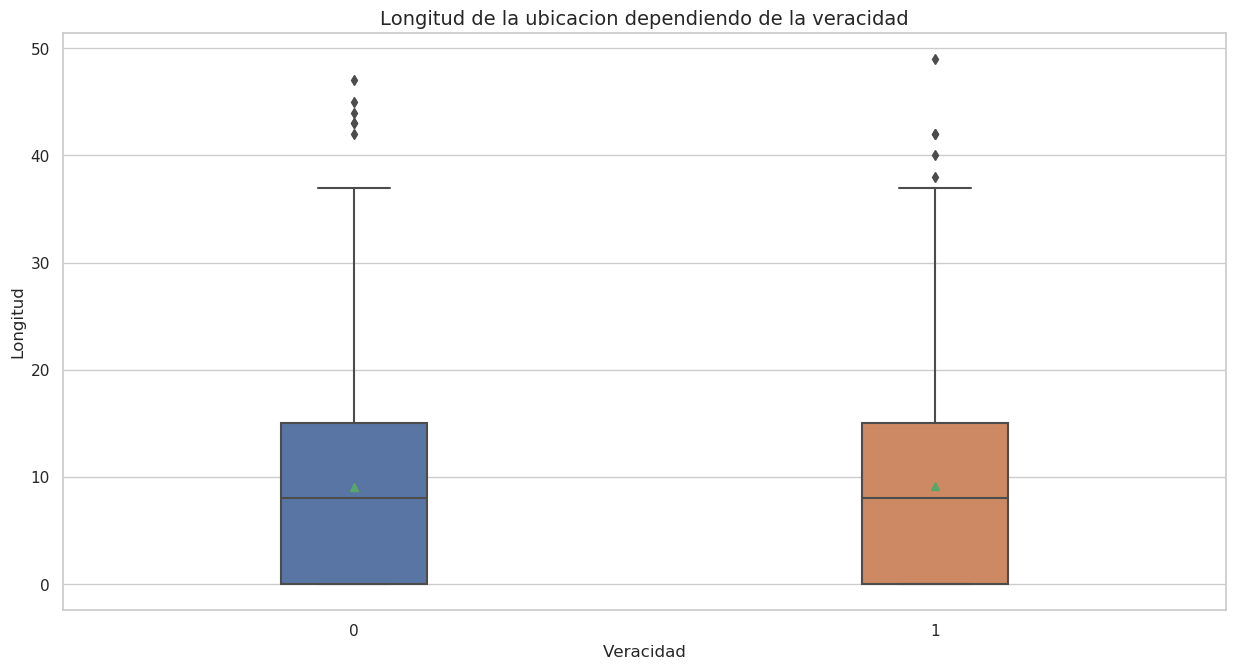

In [35]:
plt.figure(figsize=(15,7.5))
ax = sns.boxplot(y=tweets_location_length.location_length, x=tweets_location_length.target, showmeans=True, width=0.25)
ax.set_title('Longitud de la ubicacion dependiendo de la veracidad', fontsize=14)
ax.set_ylabel('Longitud')
ax.set_xlabel('Veracidad')
plt.show()

### Nulalidad de la ubicacion

Viendo el estilo del los datos al inicio podemos observar que la mayoria de las ubicaciones no nulas se encuentran en america del norte o ciudades relacionadas. Pero ¿Cuantos de estas son nulas?. Añado una columna nueva al dataframe para guardar informacion sobre si la ubicacion es nula o no.

In [36]:
loc_tweets = tweets[['location', 'text', 'target']].copy()
loc_tweets.loc[:, 'has_location'] = loc_tweets['location'].notna()
loc_tweets.head()

,location,text,target,has_location
0,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,False
1,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,False
3,NaN,"13,000 people receive #wildfires evacuation orders in California",1,False
4,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,False


Y ahora dividimos el analisis en 2 partes

#### Tweets sin ubicacion

Ahora si, ¿Cuantos tweets sin ubicacion tenemos?

In [37]:
tweets_without_loc = loc_tweets[loc_tweets['has_location'] == False].copy()
len(tweets_without_loc)

2533

¿Como es la distribucion de los tweets sin ubicacion? Armo una tabla y Grafico

In [38]:
def real_tweets(x):
    return sum([1 for y in x if y == 1])

def fake_tweets(x):
    return sum([1 for y in x if y == 0])

tweets_without_loc[['target', 'location']].groupby('target').agg(lambda x: x.size)

,location
target,
0,1458
1,1075


De los tweets sin ubicacion pareceria que la mayoria se compone de tweets falsos

In [39]:
loc_plot=tweets_without_loc.groupby('target').agg({"target": lambda x: x.size})

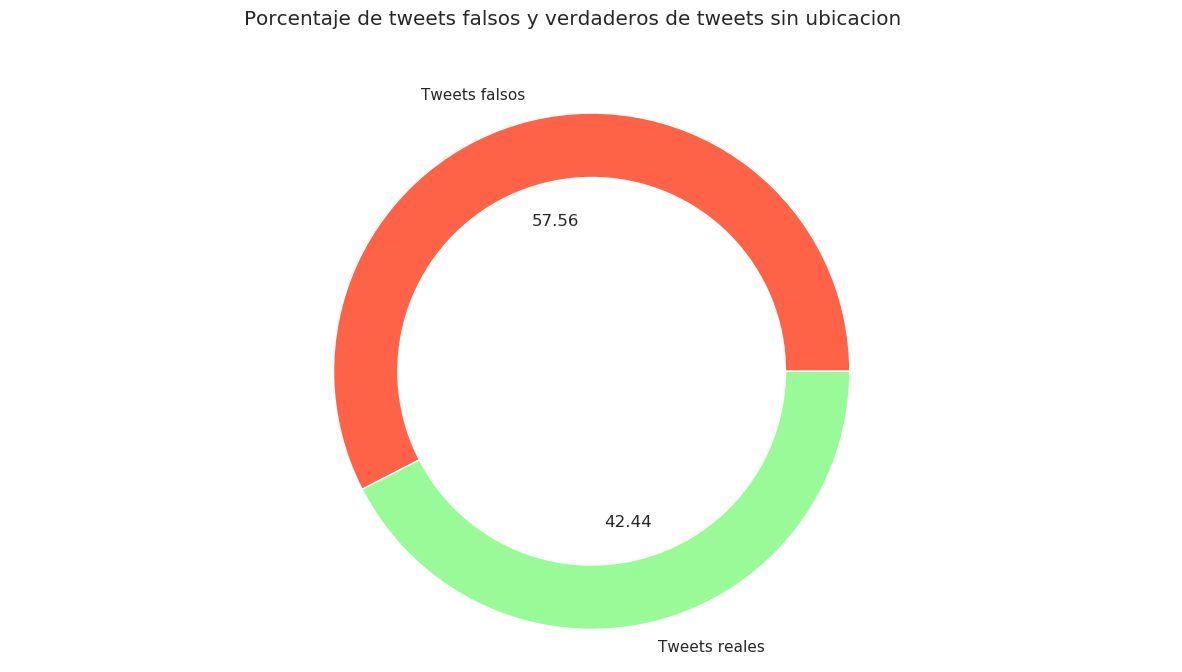

In [40]:
plt.figure(figsize=(15, 7.5))
plt.pie(loc_plot['target'], colors=['tomato', 'PaleGreen'], labels=['Tweets falsos','Tweets reales'], autopct='%.2f')

centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(15,7.5)
fig.suptitle('Porcentaje de tweets falsos y verdaderos de tweets sin ubicacion')

plt.axis('equal')
plt.show()

#### Tweets con ubicacion

¿Cuantos tweets con ubicacion tenemos?

In [41]:
tweets_with_loc = loc_tweets[loc_tweets['has_location'] == True].copy()
len(tweets_with_loc)

5080

¿Tendremos algun tipo de relacion entre la ubicacion y el texto? Creo una nueva columna `location_in_text` que represente si la ubicacion esta mencionada en el texto.

In [42]:
in_text = tweets_with_loc.apply(lambda x: x['location'] in x['text'], axis=1)
tweets_with_loc.loc[:, 'location_in_text'] = in_text
tweets_with_loc.head()

,location,text,target,has_location,location_in_text
31,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,True,False
32,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,True,False
33,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,True,True
34,"Philadelphia, PA",Crying out for more! Set me ablaze,0,True,False
35,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,True,False


In [43]:
def real_tweets(x):
    return sum([1 for y in x if y == 1])

def fake_tweets(x):
    return sum([1 for y in x if y == 0])

tweets_with_loc[['target', 'location_in_text']].groupby('location_in_text').agg({'target': [fake_tweets, real_tweets]})

target            
                 fake_tweets real_tweets
location_in_text                        
False                   2864        2156
True                      20          40

A partir de esta informacion no podemos concluir mucho ya que muy pocos tweets mencionan la ubicacion en el tweet. Aun asi podemos ver que de los que mencionan la ubicacion en el tweet el 66% son reales.

<h2><center> Análisis del texto y su veracidad </center></h2>

In [44]:
disaster_tweets = pd.read_csv('train.csv')


In [45]:
disaster_tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


-------------------------------
<h1> Información básica</h1>
<p> Acá podemos ver que todos los tweets tienen un target (veracidad) asociado, por lo tanto nos sirven todos los tweets.</p>
    <div>También podemos ver que tenemos 4342 tweets no verídicos, y 3271 que sí lo son.<div> 


In [46]:
disaster_tweets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [47]:
disaster_tweets['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

---------------------------------------------------------
<h2>Le agregamos la longitud de cada tweet a su index asociado. </h2>

In [48]:
disaster_tweets['len'] = disaster_tweets['text'].transform(lambda x : len(x))
disaster_tweets[['id', 'text', 'target', 'len']]

,id,text,target,len
0,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69
1,4,Forest fire near La Ronge Sask. Canada,1,38
2,5,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133
3,6,"13,000 people receive #wildfires evacuation orders in California",1,65
4,7,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88
...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,83
7609,10870,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,125
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,65
7611,10872,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,137


Y de paso nos quedamos con los datos que nos interesan

In [49]:
target_len_tweets = disaster_tweets.loc[:,['target', 'len']]
target_len_tweets

,target,len
0,1,69
1,1,38
2,1,133
3,1,65
4,1,88
...,...,...
7608,1,83
7609,1,125
7610,1,65
7611,1,137


-------------------------------------------------------------
<h1> Datos de las longitudes </h1>
<p> Aca podemos ver que el promedio de la longitud de los tweets verídicos es un poco mayor a los falsos.

In [50]:
target_len_tweets.groupby('target').agg({'len' : 'mean'})

,len
target,
0,95.706817
1,108.113421


<p> Los proximos dos datos dan a conocer las longitudes máximas y mínimas de cada target. De ellas no se puede sacar una gran conclusión, pero nos dan ciertos parámetros. </p>

In [51]:
target_len_tweets.groupby('target').agg({'len' : 'max'})

,len
target,
0,157
1,151


In [52]:
target_len_tweets.groupby('target').agg({'len' : 'min'})

,len
target,
0,7
1,14


----------------------------------------------------

<p> Como la máxima longitud es 157, podemos dividir las longitudes en tres grandes grupos. <p>
<ol>
    <li> Longitud menor a 50 caracteres. </li>
    <li> Longitud entre 50 y 100 caracteres. </li>
    <li> Longitud mayor a 100 caracteres. </li>
<ol>

<b>Acá podemos ver que para el primer grupo hay bastantes más falsos que verdaderos, pero una baja cantidad de ambos:

In [53]:
low_lens = target_len_tweets.groupby('len').filter( lambda x: x['len'].mean() <50)
low_lens['target'].value_counts()

0    618
1    147
Name: target, dtype: int64

<b>Para el segundo siguen habiendo más falsos que verdaderos, pero se emparejo un poco. Ya la cantidad de tweets es un poco mayor:

In [54]:
medium_lens = target_len_tweets.groupby('len').filter( lambda x: x['len'].mean() > 50 and x['len'].mean() < 100)
medium_lens['target'].value_counts()

0    1486
1    1036
Name: target, dtype: int64

<b> Finalmente, en el tercer grupo, se observa que ya las cantidades de tweets son mayores (en este grupo se encuentra la mayoría de los tweets, 4219 de 7613). Y la cantidad de verdaderos es casi la misma que de falsos, pero apenas favoreciendo a los falsos. 

In [55]:
high_lens = target_len_tweets.groupby('len').filter( lambda x: x['len'].mean() > 100)
high_lens['target'].value_counts()

0    2180
1    2039
Name: target, dtype: int64

--------------------------------------------------
<h1> Visualizaciones</h1>
Ahora paso a ejemplificar estos datos antes provistos mediante un histograma. 
Voy a dividir los datos en dos sets, uno de datos verdaderos y otro de datos falsos, y analizaré las longitudes para ambos.

In [56]:
true_tweets = target_len_tweets.groupby('target').filter(lambda x: x['target'].mean() == 1)

In [57]:
false_tweets = target_len_tweets.groupby('target').filter(lambda x: x['target'].mean() == 0)


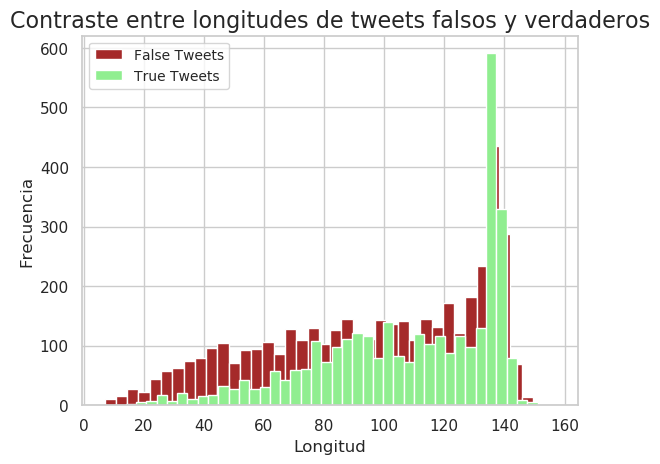

In [58]:
g = false_tweets['len'].plot.hist(bins=40, color='brown')
g = true_tweets['len'].plot.hist(bins=40, color='lightgreen')
g.set_title("Contraste entre longitudes de tweets falsos y verdaderos", fontsize=16)
g.set_xlabel("Longitud",fontsize=12)
g.set_ylabel("Frecuencia", fontsize=12)
g.legend(['False Tweets', 'True Tweets'], fontsize = 10)

A primera vista se observa como en general la mayoria de las longitudes menores estan predominadas por los tweets falsos, pero también nos damos cuenta como en realidad en el rango [135-145] de la longitd de caracteres, la cantidad de tweets verdaderos sobrepasa ligeralmente a los falsos, por lo tanto este sería el rango de longitud de caracteres "más verídica".

---------------------------------------------------------
Ahora paso a comprobar estos datos, y observo que efectivamente en ese rango hay más tweets verdaderos que falsos.

In [59]:
specific_len = disaster_tweets.loc[:,['target','len']].groupby('len').filter( lambda x: x['len'].mean() > 135 and x['len'].mean() < 145)
specific_len['target'].value_counts()

1    811
0    716
Name: target, dtype: int64

------------------------------------------------------
<h3>Ahora vamos a analizar un poco su contenido </h3>

In [60]:
disaster_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   len       7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB



Acá se puede ver que las columnas que vamos a analizar (texto y target) están completas y están en un tipo deseado (object para los textos e int para el target).



-----------------------------------------------------
Vamos a separarnos la porcion que nos interesa, el texto y su asociado target.

In [61]:
text_target = tweets[['text', 'target']]
text_target

,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,"13,000 people receive #wildfires evacuation orders in California",1
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...
7608,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


<h3>Vamos a buscar contabilizar las palabras que aparecen, tanto verdaderas como falsas, para ver si encontramos algo interesante. </h3>
Primero hacemos un split de cada tweet en palabras.

In [62]:
text_target_cpy = text_target.copy()
text_target_cpy['text'] = text_target['text'].transform(lambda x: x.split())
text_target_cpy

,text,target
0,"[Our, Deeds, are, the, Reason, of, this, #earthquake, May, ALLAH, Forgive, us, all]",1
1,"[Forest, fire, near, La, Ronge, Sask., Canada]",1
2,"[All, residents, asked, to, 'shelter, in, place', are, being, notified, by, officers., No, other, evacuation, or, shelter, in, place, orders, are, expected]",1
3,"[13,000, people, receive, #wildfires, evacuation, orders, in, California]",1
4,"[Just, got, sent, this, photo, from, Ruby, #Alaska, as, smoke, from, #wildfires, pours, into, a, school]",1
...,...,...
7608,"[Two, giant, cranes, holding, a, bridge, collapse, into, nearby, homes, http://t.co/STfMbbZFB5]",1
7609,"[@aria_ahrary, @TheTawniest, The, out, of, control, wild, fires, in, California, even, in, the, Northern, part, of, the, state., Very, troubling.]",1
7610,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawaii., http://t.co/zDtoyd8EbJ]",1
7611,"[Police, investigating, after, an, e-bike, collided, with, a, car, in, Little, Portugal., E-bike, rider, suffered, serious, non-life, threatening, injuries.]",1


Primero separo entre tweets verdaderos y tweets falsos. 

In [63]:
true = text_target_cpy.groupby('target').filter(lambda x: x.mean() == 1)
false = text_target_cpy.groupby('target').filter(lambda x: x.mean() == 0)

Para cada conjunto de tweets voy a agregar todas las palabras a una lista, para posteriormente convertirlo en una serie y poder analizarla. 

In [64]:
false = false.reset_index().loc[:,['text']]
false_words = []
for x in false['text']:
    for word in x:
        false_words.append(word)
false_words = pd.Series(false_words)

In [65]:
true = true.reset_index().loc[:,['text']]
true_words = []
for x in true['text']:
    for word in x:
        true_words.append(word)
true_words = pd.Series(true_words)

-----------------------------------------------------
Voy a contabilizar las palabras de mayor longitud que 5 caracteres ya que con menos me van a aparecer todas proposiciones y palabras que no me interesan mucho. Además, de todas estas palabras, voy a seleccionar las 10 que más aparecen y las voy a representar en un grafico de barras.

Text(0, 0.5, 'Palabras')

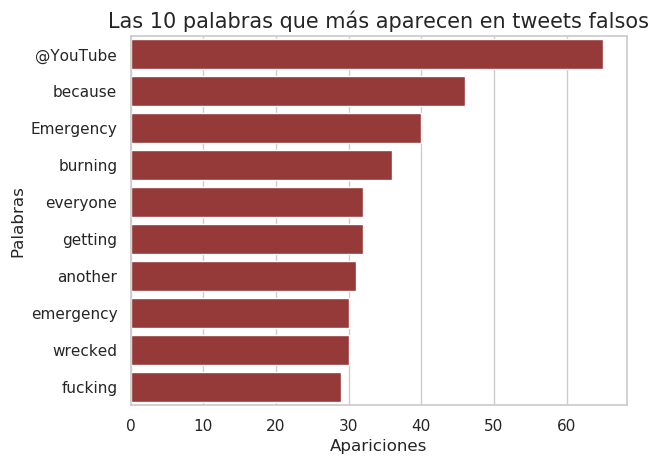

In [66]:
false_words_count = false_words[false_words.str.len() > 6].value_counts().iloc[:10]
g = sns.barplot(x=false_words_count.values, y=false_words_count.index, orient='h', color='brown')
g.set_title("Las 10 palabras que más aparecen en tweets falsos", fontsize=15)
g.set_xlabel("Apariciones", fontsize=12)
g.set_ylabel("Palabras", fontsize=12)

Podemos ver como hay algunas palabras que no nos interesan, pero aparece "@youtube" y "reddit" que nos indica que pueden estar hablando de un video de youtube o un posteo en reddit, es decir potenciales fuentes poco confiables. 

Text(0, 0.5, 'Palabras')

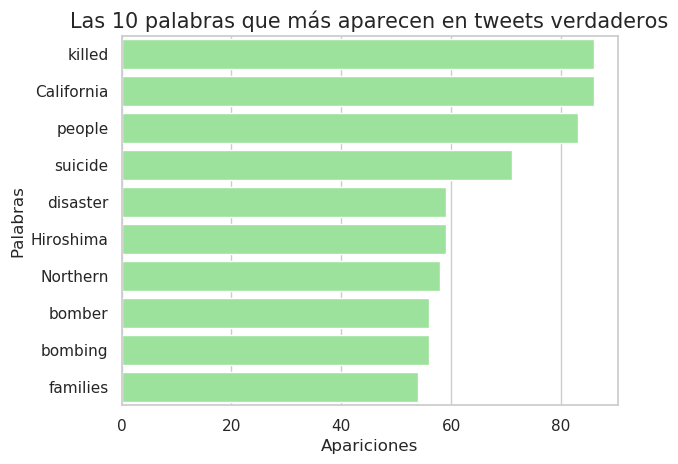

In [67]:
true_words_count = true_words[true_words.str.len() > 5].value_counts().iloc[:10]
g = sns.barplot(x=true_words_count.values, y=true_words_count.index, orient='h', color='lightgreen')
g.set_title("Las 10 palabras que más aparecen en tweets verdaderos", fontsize=15)
g.set_xlabel("Apariciones", fontsize=12)
g.set_ylabel("Palabras", fontsize=12)

<p>Ahora, analizando la sección verdadera, podemos ver como se mencionan palabras más relacionadas a desastes, tales como "killed", "suicide:, etc...</p>
También podemos ver que California es una de las palabras más utilizadas, esto se puede deber a que hubo muchos incidentes en este estado de EEUU.

-------------------------------------------------
<h3>Ahora vamos a pasar a analizar los hashtags de los tweets

Text(0, 0.5, 'Hashtags')

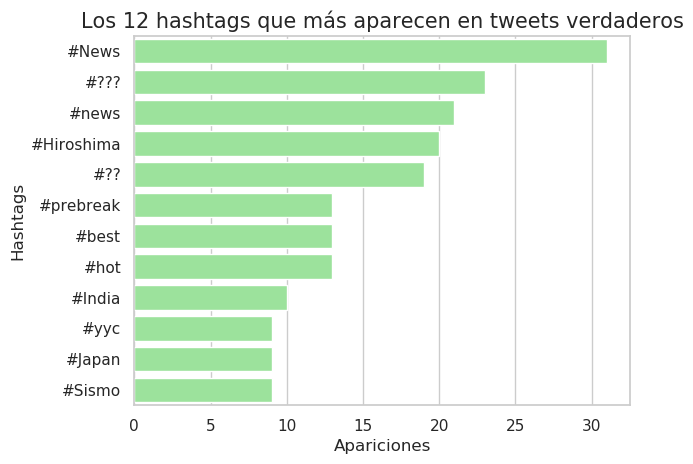

In [68]:
true_hashtags = true_words[true_words.str.contains('#')].value_counts().iloc[:12]
g = sns.barplot(x=true_hashtags.values, y=true_hashtags.index, orient='h', color='lightgreen')
g.set_title("Los 12 hashtags que más aparecen en tweets verdaderos", fontsize=15)
g.set_xlabel("Apariciones", fontsize=12)
g.set_ylabel("Hashtags", fontsize=12)

En este gráfico se pueden observar varios tweets que nos podíamos esperar encontrar, tales como "News, ???, news", pero también aparecen algunos como Hiroshima o India, que nos puede hablar que sucedieron desastres en estos lugares. 
También hay un hashtag "hot" lo que nos deja pensando si será que se habrá quemado algún lugar... el calentamiento global... o simplemente hacía mucho calor.


Text(0, 0.5, 'Hashtags')

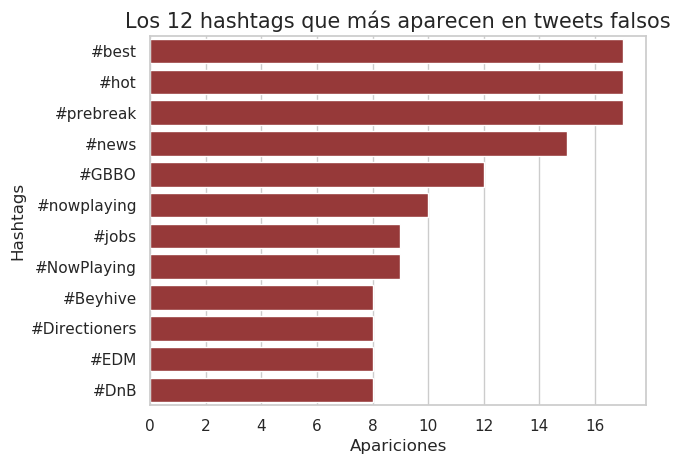

In [69]:
false_hashtags = false_words[false_words.str.contains('#')].value_counts().iloc[:12]
g = sns.barplot(x=false_hashtags.values, y=false_hashtags.index, orient='h',color='brown')
g.set_title("Los 12 hashtags que más aparecen en tweets falsos", fontsize=15)
g.set_xlabel("Apariciones", fontsize=12)
g.set_ylabel("Hashtags", fontsize=12)

En cuanto a los hashtags falsos podemos ver que vuelven a aparecer algunos como "hot", "news" y "prebreak", pero tambien surgen algunas nuevas. Vamos a analizar los tweets de prebreak para ver si nos dicen algo sobre lo que tratan.

In [70]:
disaster_tweets[disaster_tweets['text'].str.contains("#prebreak")]

,id,keyword,location,text,target,len
4391,6243,hijacking,"perth, australia",#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/gUJNPLJVvt #prebreak #best,0,119
4392,6244,hijacking,Mongolia,#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/J2aQs5loxu #prebreak #best,1,119
4393,6245,hijacking,"brisbane, australia",#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/s4PNIhJQX7 #prebreak #best,0,119
4394,6246,hijacking,China,#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/cx6auPneMu #prebreak #best,0,119
4396,6248,hijacking,"Chiyoda Ward, Tokyo",#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/wvTPuRYx63 #prebreak #best,0,119
4397,6253,hijacking,rome,#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/J5onxFwLAo #prebreak #best,0,119
4399,6255,hijacking,EastCarolina,#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/nQiObcZKrT #prebreak #best,0,119
4400,6256,hijacking,Brazil,#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/aAtt5aMnmD #prebreak #best,0,119
4403,6259,hijacking,NaN,#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/qj3PVgaVN7 #prebreak #best,1,119
4404,6261,hijacking,France,#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/6AqrNanKFD #prebreak #best,0,119


Por ultimo vamos a ver los tweets de hashtag #Beyhive y de #Directioners para ver de que tratan.

In [71]:
disaster_tweets[disaster_tweets['text'].str.contains("#Beyhive")]

,id,keyword,location,text,target,len
346,496,army,NaN,Beyonce Is my pick for http://t.co/nnMQlz91o9 Fan Army #Beyhive http://t.co/o91f3cYy0R 77,0,89
349,501,army,NaN,22.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM,0,89
350,502,army,NaN,17.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM,0,89
364,522,army,NaN,Beyonce Is my pick for http://t.co/nnMQlz91o9 Fan Army #Beyhive http://t.co/o91f3cYy0R 78,0,89
370,530,army,NaN,Beyonce Is my pick for http://t.co/nnMQlz91o9 Fan Army #Beyhive http://t.co/o91f3cYy0R 72,0,89
371,531,army,NaN,7.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM,0,88
372,533,army,NaN,Beyonce Is my pick for http://t.co/nnMQlz91o9 Fan Army #Beyhive http://t.co/o91f3cYy0R 66,0,89
373,535,army,NaN,6.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM,0,88


In [72]:
disaster_tweets[disaster_tweets['text'].str.contains("#Directioners")]

,id,keyword,location,text,target,len
347,498,army,NaN,One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1402,0,103
351,503,army,NaN,One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1411,0,103
355,512,army,NaN,Vote for #Directioners vs #Queens in the 5th round of the @Billboard #FanArmyFaceOff http://t.co/Kgtxnnbj7y,0,107
358,516,army,NaN,One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1392,1,103
360,518,army,NaN,One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1441,0,103
365,523,army,NaN,One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1386,0,103
367,526,army,NaN,One Direction Is my pick for http://t.co/y9WvqKGbBI Fan Army #Directioners http://t.co/S5F9FcOmp8,0,97
378,543,army,NaN,One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1434,0,103
379,544,army,?,One Direction Is my pick for http://t.co/iMHFdaOWRd Fan Army #Directioners http://t.co/4fTZJk94Dt,0,97


<h3>Veracidad de tweets con links

Analizamos la veracidad de los tweets que tienen links asociados al text. 
Primero averiguamos la cantidad de filas a analizar

In [73]:
text_target_link=text_target.loc[(text_target['text'].str.contains("http://"))]
fake_and_real_tweets_with_links=text_target_link.groupby('target').agg({'target':'count'})
fake_and_real_tweets_with_links['target'].sum()

3604

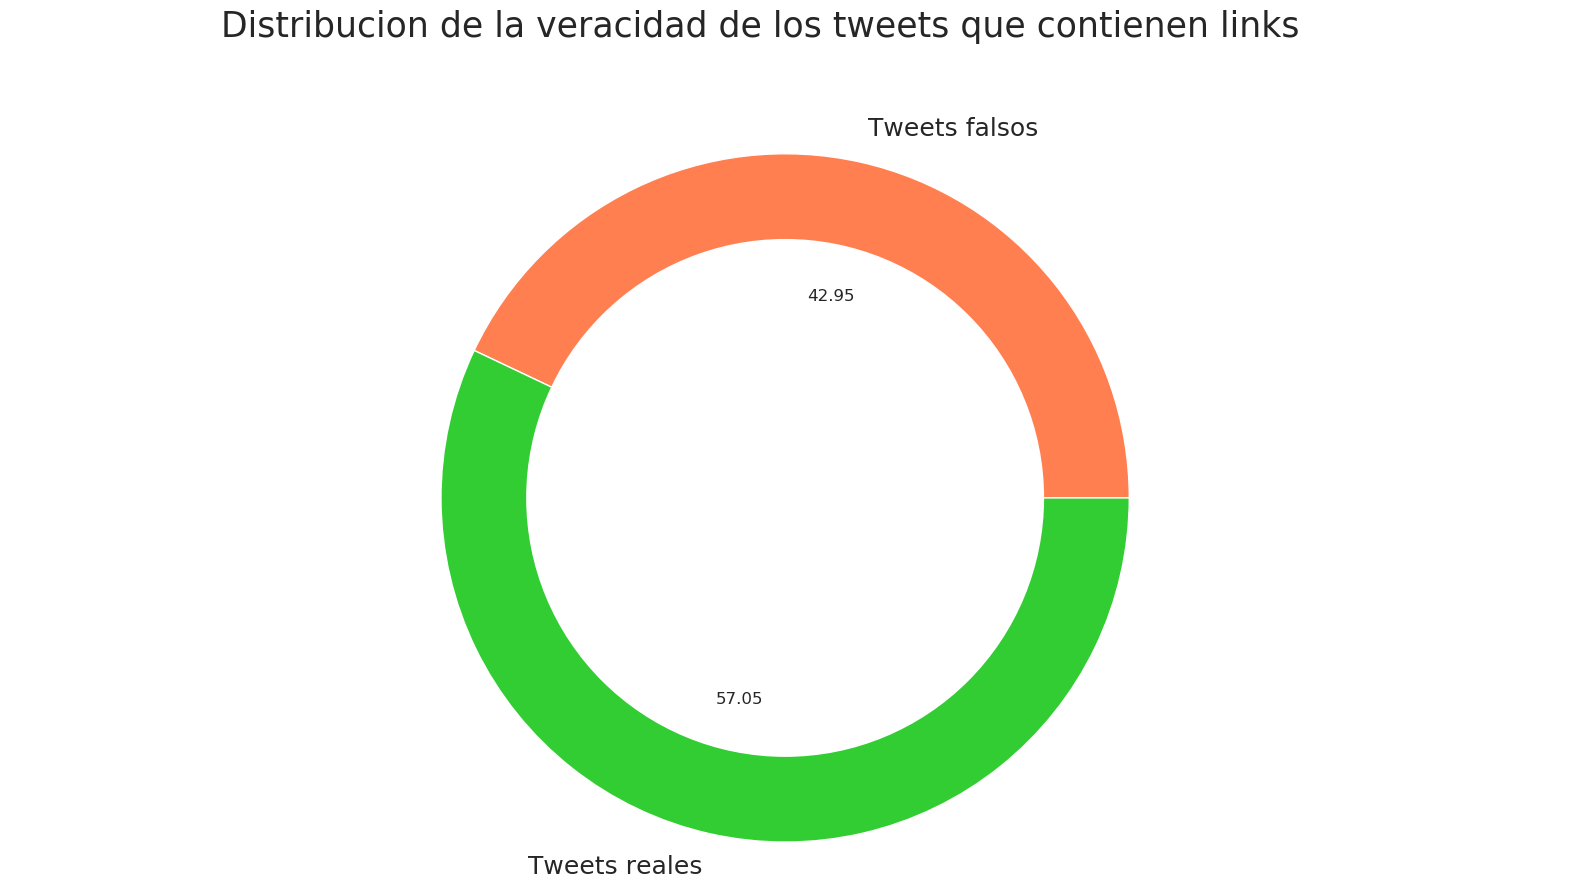

In [74]:
plt.figure(figsize=(15, 7.5))
patches, texts, autotexts= plt.pie(fake_and_real_tweets_with_links['target'],colors=['Coral', 'limegreen'], labels=['Tweets falsos','Tweets reales'], autopct='%.2f')
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(20,10)
fig.suptitle('Distribucion de la veracidad de los tweets que contienen links',fontsize=25)
plt.axis('equal')
plt.show()

<h2>Análisis de veracidad respecto a los tipos de caracter del texto

Con el objetivo de seguir analizando la veracidad de los textos, intentamos profundizar aun más en ello. Para esto, vamos a analizar la cantidad de distintos tipos de caracter en proporcion de la longitud del texto y como se relaciona esto con la veracidad del mismo. <br>Para ello, reutilizaremos el dataframe antes creado y modificado, el cual ya contiene el tamaño del texto.

In [75]:
disaster_tweets

,id,keyword,location,text,target,len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,137


Para esclarecer la informacion, nos quedaremos con las tres columnas que consideramos esenciales para este analisis

In [76]:
text_target_len = disaster_tweets[['text','target','len']].copy()
text_target_len

,text,target,len
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133
3,"13,000 people receive #wildfires evacuation orders in California",1,65
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88
...,...,...,...
7608,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,83
7609,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,125
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,65
7611,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,137


Vamos a comprobar si alguna de las columnas contiene un elemento nulo.

In [77]:
text_target_len.count()

text      7613
target    7613
len       7613
dtype: int64

In [78]:
len(text_target_len.index)

7613

Como podemos ver, tenemos igual cantidad de elementos en las columnas que de indices, por ende no tenemos elementos nulos. Continuamos con el analisis.

En el siguiente codigo, pasaremos a agregar columnas que nos indiquen la proporcion de mayusculas, numeros, caracter arroba y signo de pregunta en los textos presentes. Utilizaremos estos porcentajes para luego analizarlos uno por uno.

In [79]:
def count_uppercase(x):
    return sum(1 for c in str(x) if c.isupper())

def count_numeric(x):
    return sum(1 for c in str(x) if (c.isnumeric()))

def count_arroba(x):
    return sum(1 for c in str(x) if (c == '@'))

def count_question(x):
    return sum(1 for c in str(x) if ((c == '?') or (c == '¿')))

text_target_len['uppercase_percentage'] = ((text_target_len['text'].map(lambda x: count_uppercase(x)) / \
                                           text_target_len['len']) * 100).round(2)

text_target_len['numeric_percentage'] = ((text_target_len['text'].map(lambda x: count_numeric(x)) / \
                                           text_target_len['len']) * 100).round(2)

text_target_len['arroba_percentage'] = ((text_target_len['text'].map(lambda x: count_arroba(x)) / \
                                           text_target_len['len']) * 100).round(2)

text_target_len['question_percentage'] = ((text_target_len['text'].map(lambda x: count_question(x)) / \
                                           text_target_len['len']) * 100).round(2)


text_target_len


,text,target,len,uppercase_percentage,numeric_percentage,arroba_percentage,question_percentage
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69,14.49,0.00,0.0,0.00
1,Forest fire near La Ronge Sask. Canada,1,38,13.16,0.00,0.0,0.00
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133,1.50,0.00,0.0,0.00
3,"13,000 people receive #wildfires evacuation orders in California",1,65,1.54,7.69,0.0,0.00
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88,3.41,0.00,0.0,0.00
...,...,...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,83,8.43,1.20,0.0,0.00
7609,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,125,4.80,0.00,1.6,0.00
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,65,15.38,13.85,0.0,1.54
7611,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,137,2.92,0.00,0.0,0.00


<h3> Mayúsculas

Primero deberemos diferenciar entre los tweets que tengan mayusculas de los que no tienen ninguna. Por lo tanto, vamos a extraer un dataframe para los textos con porcentaje nulo y evaluar su promedio de veracidad

In [80]:
text_target_len_not_upper = text_target_len[text_target_len["uppercase_percentage"] == 0]
text_target_len_not_upper

,text,target,len,uppercase_percentage,numeric_percentage,arroba_percentage,question_percentage
20,this is ridiculous....,0,22,0.0,0.0,0.00,0.00
41,on the outside you're ablaze and alive\nbut you're dead inside,0,61,0.0,0.0,0.00,0.00
79,the pastor was not in the scene of the accident......who was the owner of the range rover ?,1,91,0.0,0.0,0.00,1.10
80,mom: 'we didn't get home as fast as we wished' \nme: 'why is that?'\nmom: 'there was an accident and some truck spilt mayonnaise all over ??????,0,142,0.0,0.0,0.00,4.93
98,@flowri were you marinading it or was it an accident?,0,53,0.0,0.0,1.89,1.89
...,...,...,...,...,...,...,...
7498,i still don't see the point of a frozen sequel like where's the wreck it ralph sequel,0,85,0.0,0.0,0.00,0.00
7545,late night mcdonalds with friends = hilarious although my car is wrecked and there's half a steak pastie in the industrial estate,0,129,0.0,0.0,0.00,0.00
7546,good luck to everyone who has school soon but your sleeping schedule is wrecked beyond repair,0,93,0.0,0.0,0.00,0.00
7562,you wrecked my whole world,0,26,0.0,0.0,0.00,0.00


Una vez obtenido este dataframe, vamos a evaluar su veracidad agrupando por target y contando cuantos son reales y cuantos falsos

In [81]:
text_target_len_not_upper_grouped = text_target_len_not_upper.groupby(['target']).agg({"target":["count"]})
text_target_len_not_upper_grouped.columns = text_target_len_not_upper_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_not_upper_grouped.columns.get_level_values(1)
text_target_len_not_upper_grouped

,target-count
target,
0,221
1,57


In [82]:
(text_target_len_not_upper_grouped.loc[0] / len(text_target_len_not_upper) * 100).round(2)

target-count    79.5
Name: 0, dtype: float64

Podemos ver que el 79.5% de los tweets que no tienen ninguna mayúscula son falsos.

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

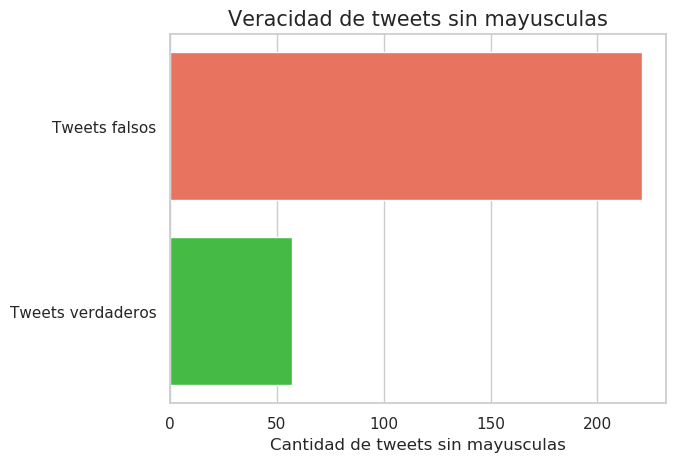

In [83]:
g = sns.barplot(x='target-count', \
               y=text_target_len_not_upper_grouped.index,data =text_target_len_not_upper_grouped,\
                palette=["tomato","limegreen"],orient="h")

g.set_title("Veracidad de tweets sin mayusculas", fontsize=15)
g.set_ylabel("", fontsize=12)
g.set_xlabel("Cantidad de tweets sin mayusculas", fontsize=12)
g.set_yticklabels(labels=['Tweets falsos','Tweets verdaderos'])




Vamos a repetir este analisis pero para los textos que al menos tengan una mayúscula en su contenido.

In [84]:
text_target_len_upper = text_target_len[text_target_len["uppercase_percentage"] > 0]

text_target_len_upper_grouped = text_target_len_upper.groupby(['target']).agg({"target":["count"]})
text_target_len_upper_grouped.columns = text_target_len_upper_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_upper_grouped.columns.get_level_values(1)
text_target_len_upper_grouped

,target-count
target,
0,4121
1,3214


In [85]:
(text_target_len_upper_grouped.loc[0] / len(text_target_len_upper) * 100).round(2)

target-count    56.18
Name: 0, dtype: float64

Vemos que en este caso el porcentaje de veracidad no es tan alto como en los textos sin mayúscula.

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

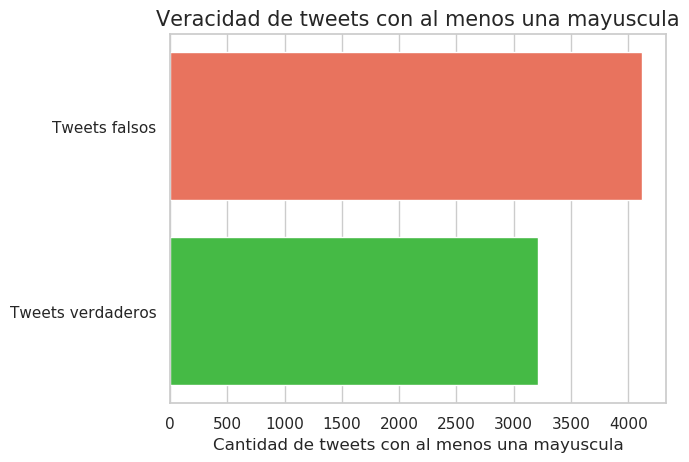

In [86]:
h = sns.barplot(x='target-count', y=text_target_len_upper_grouped.index,\
                palette=["tomato","limegreen"],orient='h',data=text_target_len_upper_grouped)

h.set_title("Veracidad de tweets con al menos una mayuscula", fontsize=15)
h.set_ylabel("", fontsize=12)
h.set_xlabel("Cantidad de tweets con al menos una mayuscula", fontsize=12)
h.set_yticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Para continuar el analisis, tomaremos los porcentajes que sean mayores a 0, es decir, para todos los tweets que al menos tengan una mayúscula. Hacemos esta distinción porque vamos a analizar el promedio de las mayúsculas en los tweets y no tendría sentido incluir aquellos que no tengan al menos una mayúscula en su contenido.

In [87]:
text_target_len_grouped_mayus = text_target_len_upper.groupby(['target']).agg({"uppercase_percentage":["mean","count"]})
text_target_len_grouped_mayus.columns = text_target_len_grouped_mayus.columns.get_level_values(0) \
                                        + "-" + text_target_len_grouped_mayus.columns.get_level_values(1)
text_target_len_grouped_mayus


,uppercase_percentage-mean,uppercase_percentage-count
target,,
0,10.322274,4121
1,10.371549,3214


Podemos ver que el promedio es casi identico tanto para los tweets reales como falsos. Vamos a graficar como se distribuye el promedio tanto para los tweets reales como falsos y los graficaremos en un kdeplot solapado.

Text(0, 0.5, 'Densidad')

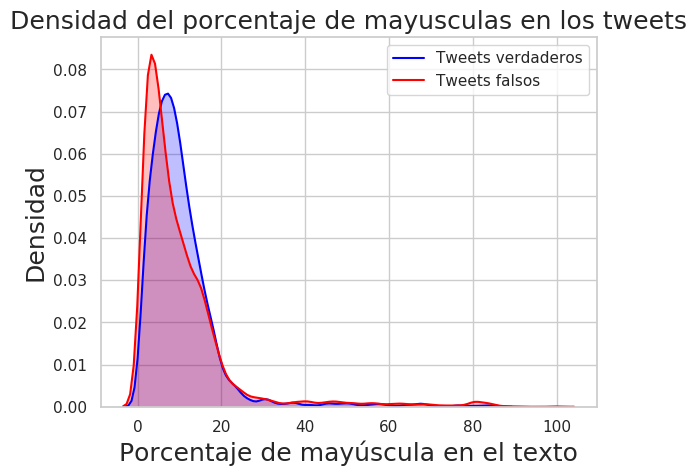

In [88]:
plot_tweets_mayus = sns.kdeplot(text_target_len_upper[text_target_len_upper['target'] == 1]["uppercase_percentage"],color="blue",label='Tweets verdaderos',
                 shade=True)
plot_tweets_mayus = sns.kdeplot(text_target_len_upper[text_target_len_upper['target'] == 0]["uppercase_percentage"],color="red",label='Tweets falsos',
                 shade=True)

plot_tweets_mayus.set_title("Densidad del porcentaje de mayusculas en los tweets", fontsize=18)
plot_tweets_mayus.set_xlabel("Porcentaje de mayúscula en el texto",fontsize=18)
plot_tweets_mayus.set_ylabel("Densidad", fontsize=18)

Vamos a verificar la visualizacion para ver en que valores cada tipo de tweet se repite mas con un catplot.

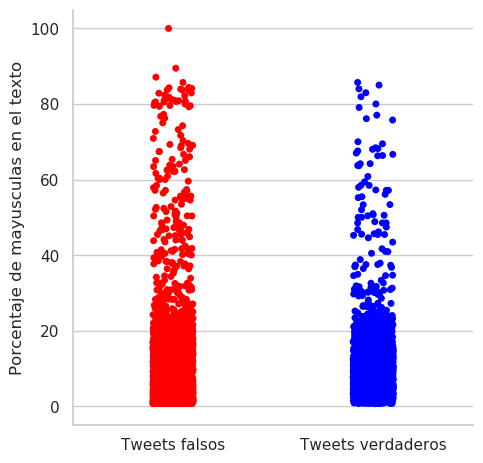

In [89]:
y = sns.catplot(x="target", y="uppercase_percentage", data=text_target_len_upper, palette = ["red","blue"]);
y.set_xticklabels(labels=['Tweets falsos','Tweets verdaderos'])
y.set_axis_labels("", "Porcentaje de mayusculas en el texto")

In [90]:
text_target_len_upper[text_target_len_upper['target'] == 0].nlargest(1,"uppercase_percentage")["text"]

24    LOOOOOOL
Name: text, dtype: object

In [91]:
text_target_len_upper[text_target_len_upper['target'] == 1].nlargest(1,"uppercase_percentage")["text"]

1440    UNPREDICTABLE DISCONNECTED AND SOCIAL CASUALTY ARE MY FAVORITES HOW DO PEOPLE NOT LIKE THEM
Name: text, dtype: object

<h3>Caracteres numericos

Siguiendo la misma lógica del analisis de mayusuculas, podemos investigar la proporcion de caracteres numericos.

In [92]:
text_target_len_not_number = text_target_len[text_target_len["numeric_percentage"] == 0]
text_target_len_not_number

,text,target,len,uppercase_percentage,numeric_percentage,arroba_percentage,question_percentage
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69,14.49,0.0,0.00,0.00
1,Forest fire near La Ronge Sask. Canada,1,38,13.16,0.0,0.00,0.00
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133,1.50,0.0,0.00,0.00
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88,3.41,0.0,0.00,0.00
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,95,4.21,0.0,0.00,0.00
...,...,...,...,...,...,...,...
7596,RT @LivingSafely: #NWS issues Severe #Thunderstorm Warnings for parts of #AR #NC #OK. Expect more trauma cases: http://t.co/FWqfCKNCQW,1,134,18.66,0.0,0.75,0.00
7602,a siren just went off and it wasn't the Forney tornado warning ??,1,65,1.54,0.0,0.00,3.08
7605,on the flip side I'm at Walmart and there is a bomb and everyone had to evacuate so stay tuned if I blow up or not,1,114,2.63,0.0,0.00,0.00
7609,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,125,4.80,0.0,1.60,0.00


Luego, vamos a agruparlos por veracidad.

In [93]:
text_target_len_not_number_grouped = text_target_len_not_number.groupby(['target']).agg({"target":["count"]})
text_target_len_not_number_grouped.columns = text_target_len_not_number_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_not_number_grouped.columns.get_level_values(1)
text_target_len_not_number_grouped

,target-count
target,
0,2187
1,901


In [94]:
(text_target_len_not_number_grouped.loc[0] / len(text_target_len_not_number) * 100).round(2)

target-count    70.82
Name: 0, dtype: float64

Y tenemos un porcentaje del 70% de falsedad de los tweets para aquellos que no tiene un numero

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

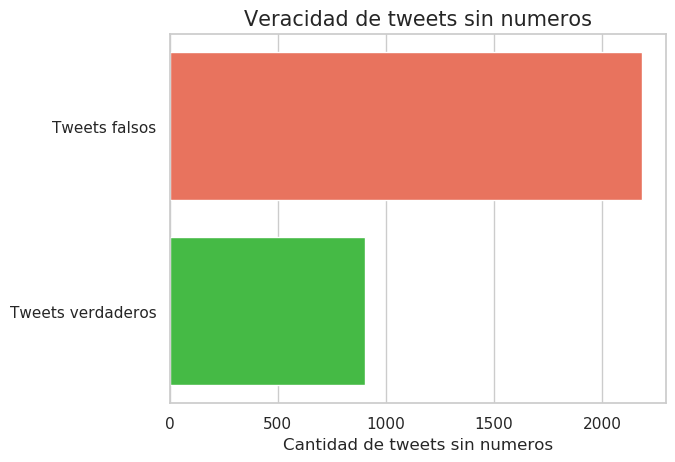

In [95]:
g = sns.barplot(x='target-count', \
                y=text_target_len_not_number_grouped.index,palette=["tomato","limegreen"],orient='h',\
               data=text_target_len_not_number_grouped)

g.set_title("Veracidad de tweets sin numeros", fontsize=15)
g.set_ylabel("", fontsize=12)
g.set_xlabel("Cantidad de tweets sin numeros", fontsize=12)
g.set_yticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Verificaremos lo mismo para aquellos que tienen al menos un número.

In [96]:
text_target_len_number = text_target_len[text_target_len["numeric_percentage"] > 0]

text_target_len_number_grouped = text_target_len_number.groupby(['target']).agg({"target":["count"]})
text_target_len_number_grouped.columns = text_target_len_number_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_number_grouped.columns.get_level_values(1)
text_target_len_number_grouped

,target-count
target,
0,2155
1,2370


In [97]:
(text_target_len_number_grouped.loc[0] / len(text_target_len_number) * 100).round(2)

target-count    47.62
Name: 0, dtype: float64

Una vez mas, podemos ver que para aquellos tweets que al menos tengan un número, la diferencia no es muy grande.

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

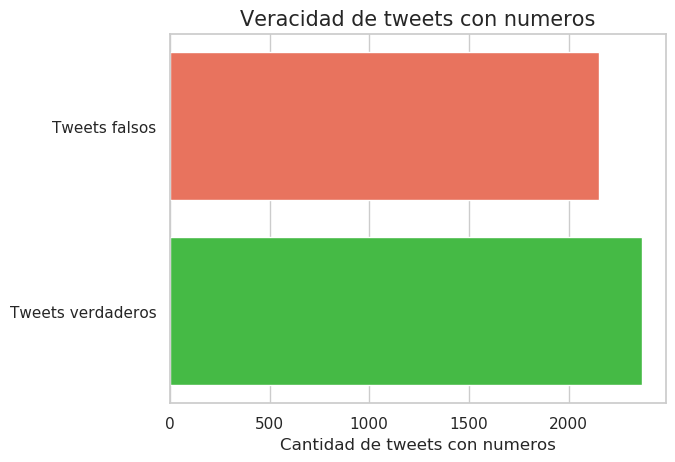

In [98]:
h = sns.barplot(x='target-count', \
                y=text_target_len_number_grouped.index,palette=["tomato","limegreen"],orient='h',\
               data = text_target_len_number_grouped)

h.set_title("Veracidad de tweets con numeros", fontsize=15)
h.set_ylabel("", fontsize=12)
h.set_xlabel("Cantidad de tweets con numeros", fontsize=12)
h.set_yticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Ahora, vamos a analizar el promedio de cantidad de numeros de los tweets para aquellos que al menos tengan un numero. Se agrupara para saber el porcentaje y la cantidad de caracteres numericos para todos los tweets tanto falsos como verdaderos.

In [99]:
text_target_len_grouped_numeric = text_target_len_number.groupby(['target']).agg({"numeric_percentage":["mean","count"]})
text_target_len_grouped_numeric.columns = text_target_len_grouped_numeric.columns.get_level_values(0) \
                                        + "-" + text_target_len_grouped_numeric.columns.get_level_values(1)
text_target_len_grouped_numeric


,numeric_percentage-mean,numeric_percentage-count
target,,
0,3.140710,2155
1,3.356245,2370


Podemos ver que los promedios son practicamente similares.

Vamos a graficar la distribucion de ambos valores

Text(0, 0.5, 'Densidad')

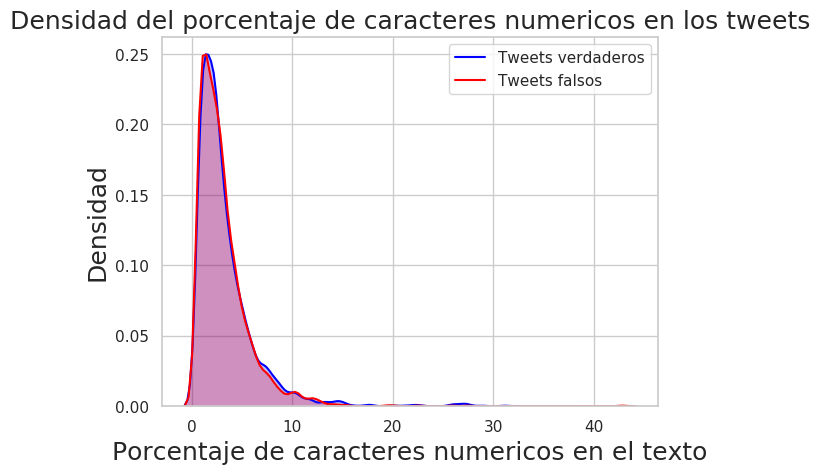

In [100]:
plot_tweets_numeric = sns.kdeplot(text_target_len_number[text_target_len_number['target'] == 1]["numeric_percentage"],color="blue",label='Tweets verdaderos',
                 shade=True)
plot_tweets_numeric = sns.kdeplot(text_target_len_number[text_target_len_number['target'] == 0]["numeric_percentage"],color="red",label='Tweets falsos',
                 shade=True)

plot_tweets_numeric.set_title("Densidad del porcentaje de caracteres numericos en los tweets", fontsize=18)
plot_tweets_numeric.set_xlabel("Porcentaje de caracteres numericos en el texto",fontsize=18)
plot_tweets_numeric.set_ylabel("Densidad", fontsize=18)


Verificamos como se distribuyen los porcentajes con un cat plot.

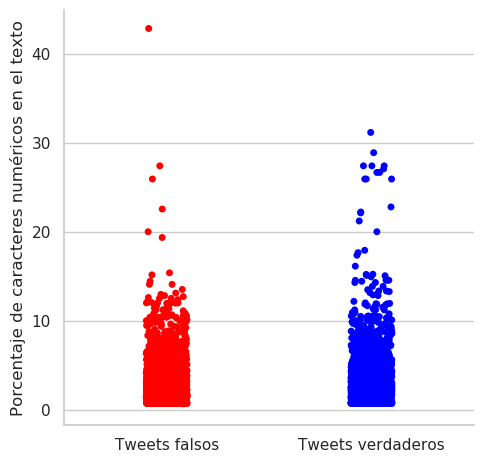

In [101]:
z = sns.catplot(x="target", y="numeric_percentage", data=text_target_len_number, palette = ["red","blue"]);
z.set_xticklabels(labels=['Tweets falsos','Tweets verdaderos'])
z.set_axis_labels("", "Porcentaje de caracteres numéricos en el texto")

In [102]:
text_target_len_number[text_target_len_number['target'] == 1].nlargest(1,"numeric_percentage")["text"]

6167    Thu Aug 06 2015 01:20:32 GMT+0000 (UTC)\n#millcityio #20150613\ntheramin sirens
Name: text, dtype: object

In [103]:
text_target_len_number[text_target_len_number['target'] == 0].nlargest(7,"numeric_percentage")["text"]

5115                                                                                                                                    Err:509
3057    #Sismo M 1.3 - 1km NNE of The Geysers California: Time2015-08-05 23:40:21 UTC2015-08-05 16:40:21 -07:00 a... http://t.co/x6el3ySYcn #CS
3056    #USGS M 1.4 - 4km E of Interlaken California: Time2015-08-06 00:52:25 UTC2015-08-05 17:52:25 -07:00 at ep... http://t.co/zqrcptLrUM #SM
5444                                     UNWANTED PERSON at 200 BLOCK OF SE 12TH AVE PORTLAND OR [Portland Police #PP15000266818] 17:10 #pdx911
4200              95-03 BMW 528 530 540 740 Emergency Warning Hazard Switch Button OEM 20177-707D http://t.co/kVNahTHUWZ http://t.co/Y8xkNpqMnJ
3855               New Giant Flames (Giant Manly Brown) info/order sms:087809233445 pin:2327564d http://t.co/T1mBw0ia3o  http://t.co/CLfa0PY5Lm
5983                                                                                                                 @DaneMillar1 *screa

<h3>Caracter arroba

Para dicha investigación, nos centraremos en la relación entre la existencia del caracter arroba (@) en el contenido del tweet y su veracidad.

In [104]:
text_target_len_arroba = text_target_len[text_target_len["arroba_percentage"] > 0]
text_target_len_not_arroba = text_target_len[text_target_len["arroba_percentage"] == 0]

Evaluaremos la veracidad para aquellos que contienen arroba.

In [105]:
text_target_len_arroba_grouped = text_target_len_arroba.groupby(["target"]).agg({"target":["count"]})
text_target_len_arroba_grouped.columns = text_target_len_arroba_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_arroba_grouped.columns.get_level_values(1)
text_target_len_arroba_grouped

,target-count
target,
0,1363
1,676


In [106]:
((text_target_len_arroba_grouped.loc[0]/ len(text_target_len_arroba)) * 100).round(2)

target-count    66.85
Name: 0, dtype: float64

Tenemos un 66.85% de que sea un tweet falso para aquellos tweets que contienen al menos un arroba

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

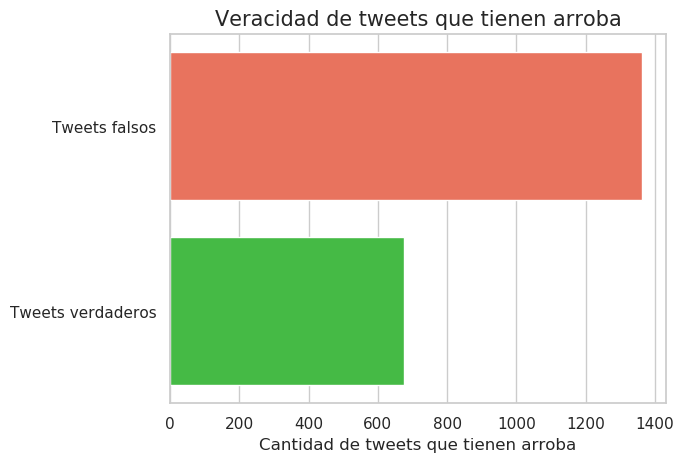

In [107]:
h = sns.barplot(x='target-count',\
            y=text_target_len_arroba_grouped.index,palette=["tomato","limegreen"],orient='h',\
           data = text_target_len_arroba_grouped)

h.set_title("Veracidad de tweets que tienen arroba", fontsize=15)
h.set_ylabel("", fontsize=12)
h.set_xlabel("Cantidad de tweets que tienen arroba", fontsize=12)
h.set_yticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Calculamos la veracidad para los que no tiene arroba

In [108]:
text_target_len_not_arroba_grouped = text_target_len_not_arroba.groupby(["target"]).agg({"target":["count"]})
text_target_len_not_arroba_grouped.columns = text_target_len_not_arroba_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_not_arroba_grouped.columns.get_level_values(1)
text_target_len_not_arroba_grouped

,target-count
target,
0,2979
1,2595


Vemos que en este caso, no tenemos un margen muy grande entre uno y otro

In [109]:
((text_target_len_not_arroba_grouped.loc[0]/len(text_target_len_not_arroba))*100).round(2)

target-count    53.44
Name: 0, dtype: float64

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

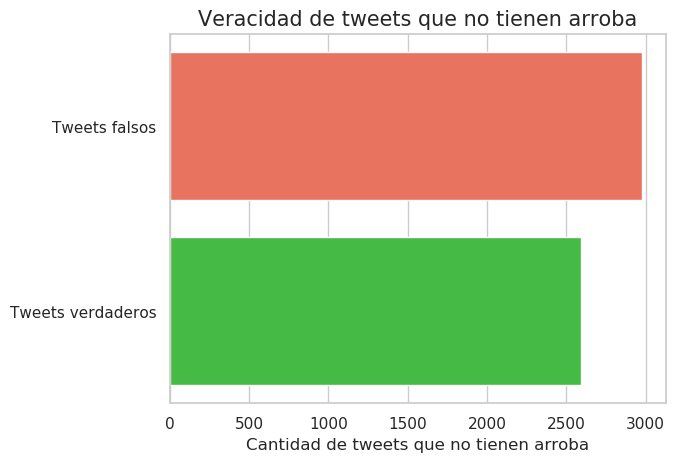

In [110]:
h = sns.barplot(x='target-count',\
            y=text_target_len_not_arroba_grouped.index,palette=["tomato","limegreen"],orient='h',\
           data = text_target_len_not_arroba_grouped)

h.set_title("Veracidad de tweets que no tienen arroba", fontsize=15)
h.set_ylabel("", fontsize=12)
h.set_xlabel("Cantidad de tweets que no tienen arroba", fontsize=12)
h.set_yticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Ahora para grupo que tiene tweets con arroba, verificaremos el promedio de cantidad de arrobas tanto para reales como para falsos.

In [111]:
text_target_len_grouped_arroba = text_target_len_arroba.groupby(['target']).agg({"arroba_percentage":["mean","count"]})
text_target_len_grouped_arroba.columns = text_target_len_grouped_arroba.columns.get_level_values(0) \
                                        + "-" + text_target_len_grouped_arroba.columns.get_level_values(1)
text_target_len_grouped_arroba

,arroba_percentage-mean,arroba_percentage-count
target,,
0,1.621981,1363
1,1.350296,676


Veamos como se distribuyen estos valores.

Text(0, 0.5, 'Densidad')

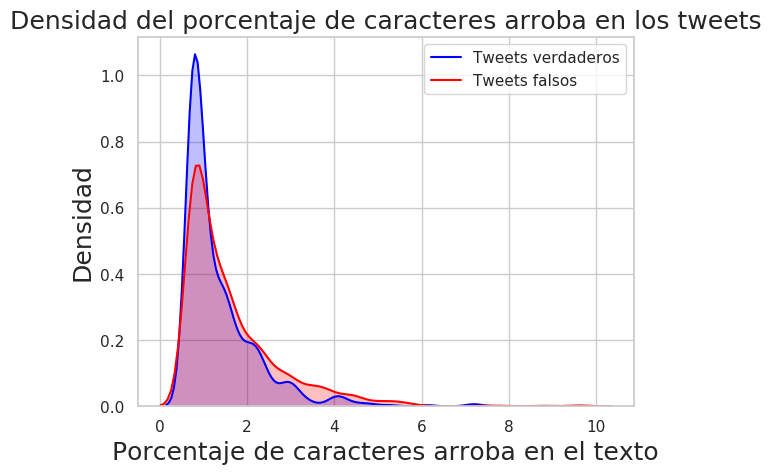

In [112]:
plot_tweets_arroba = sns.kdeplot(text_target_len_arroba[text_target_len_arroba['target'] == 1]["arroba_percentage"],color="blue",label='Tweets verdaderos',
                 shade=True)
plot_tweets_arroba = sns.kdeplot(text_target_len_arroba[text_target_len_arroba['target'] == 0]["arroba_percentage"],color="red",label='Tweets falsos',
                 shade=True)

plot_tweets_arroba.set_title("Densidad del porcentaje de caracteres arroba en los tweets", fontsize=18)
plot_tweets_arroba.set_xlabel("Porcentaje de caracteres arroba en el texto",fontsize=18)
plot_tweets_arroba.set_ylabel("Densidad", fontsize=18)

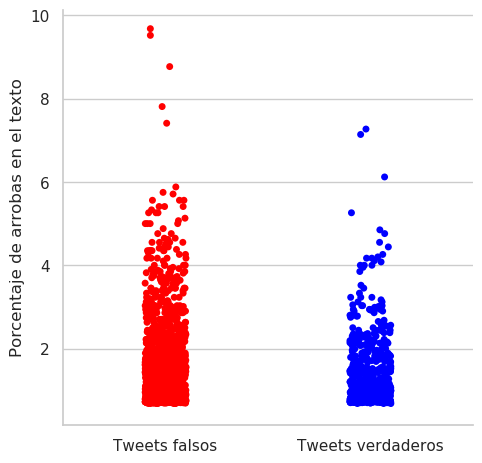

In [113]:
z = sns.catplot(x="target", y="arroba_percentage", data=text_target_len_arroba, palette = ["red","blue"]);
z.set_xticklabels(labels=['Tweets falsos','Tweets verdaderos'])
z.set_axis_labels("", "Porcentaje de arrobas en el texto")

In [114]:
text_target_len_arroba[text_target_len_arroba['target'] == 0].nlargest(5,"arroba_percentage")["text"]

6305      @PLlolz @Grazed @Stretcher @invalid @witter @Towel still a lot
6311     @invalid @Grazed @Towel @Stretcher @PLlolz @witter I can't stop
6313           @Grazed @invalid @Stretcher @Rexyy @Towel 'Ben favorited'
6296    @Stretcher @invalid @Grazed @Rexyy @Towel I see the programme (:
6301              @Stretcher @Rexyy @invalid @Towel let's have babies??!
Name: text, dtype: object

In [115]:
text_target_len_arroba[text_target_len_arroba['target'] == 1].nlargest(1,"arroba_percentage")["text"]

5795    @jasalhad @brianboru67 @Jimskiv92 @hijinks1967 Rioting.
Name: text, dtype: object

<h3> Caracter signo de pregunta

Por ultimo, repetiremos los analisis antes realizados pero esta vez buscando el caracter '?'

In [116]:
text_target_len_question = text_target_len[text_target_len["question_percentage"] > 0]
text_target_len_not_question = text_target_len[text_target_len["question_percentage"] == 0]

Evaluamos veracidad de aquellos que tienen signo de pregunta

In [117]:
text_target_len_question_grouped = text_target_len_question.groupby(["target"]).agg({"target":["count"]})
text_target_len_question_grouped.columns = text_target_len_question_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_question_grouped.columns.get_level_values(1)
text_target_len_question_grouped

,target-count
target,
0,750
1,292


Vemos que la presencia de un caracter como el signo de pregunta en un tweet da mayor probabilidad de ser falso.

In [118]:
(text_target_len_question_grouped.loc[0] / len(text_target_len_question) * 100).round(2)

target-count    71.98
Name: 0, dtype: float64

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

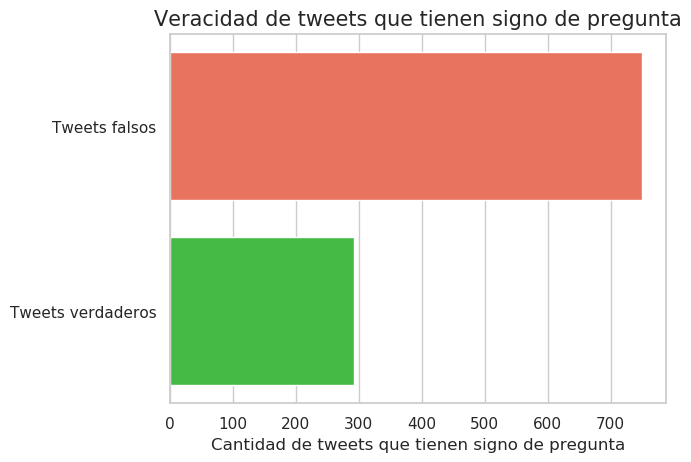

In [119]:
h = sns.barplot(x='target-count',\
            y=text_target_len_question_grouped.index,palette=["tomato","limegreen"],orient='h',\
           data = text_target_len_question_grouped)

h.set_title("Veracidad de tweets que tienen signo de pregunta", fontsize=15)
h.set_ylabel("", fontsize=12)
h.set_xlabel("Cantidad de tweets que tienen signo de pregunta", fontsize=12)
h.set_yticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Ahora, analizamos para los que no tienen signo de pregunta

In [120]:
text_target_len_not_question_grouped = text_target_len_not_question.groupby(["target"]).agg({"target":["count"]})
text_target_len_not_question_grouped.columns = text_target_len_not_question_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_not_question_grouped.columns.get_level_values(1)
text_target_len_not_question_grouped

,target-count
target,
0,3592
1,2979


In [121]:
(text_target_len_not_question_grouped.loc[0] / len(text_target_len_not_question) * 100).round(2)

target-count    54.66
Name: 0, dtype: float64

Ahora graficamos

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

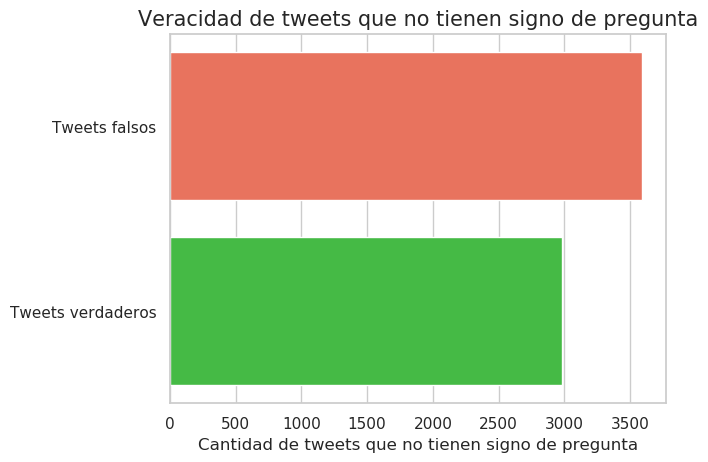

In [122]:
h = sns.barplot(x='target-count',\
            y=text_target_len_not_question_grouped.index,palette=["tomato","limegreen"],orient='h',\
           data = text_target_len_not_question_grouped)

h.set_title("Veracidad de tweets que no tienen signo de pregunta", fontsize=15)
h.set_ylabel("", fontsize=12)
h.set_xlabel("Cantidad de tweets que no tienen signo de pregunta", fontsize=12)
h.set_yticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Vamos a agrupar los valores por target para aquellos tweets que tienen un signo de pregunta

In [123]:
text_target_len_grouped_question = text_target_len_question.groupby(['target']).agg({"question_percentage":["mean","count"]})
text_target_len_grouped_question.columns = text_target_len_grouped_question.columns.get_level_values(0) \
                                        + "-" + text_target_len_grouped_question.columns.get_level_values(1)
text_target_len_grouped_question

,question_percentage-mean,question_percentage-count
target,,
0,4.438667,750
1,3.281541,292


Ahora visualicemos estos datos.

Text(0, 0.5, 'Densidad')

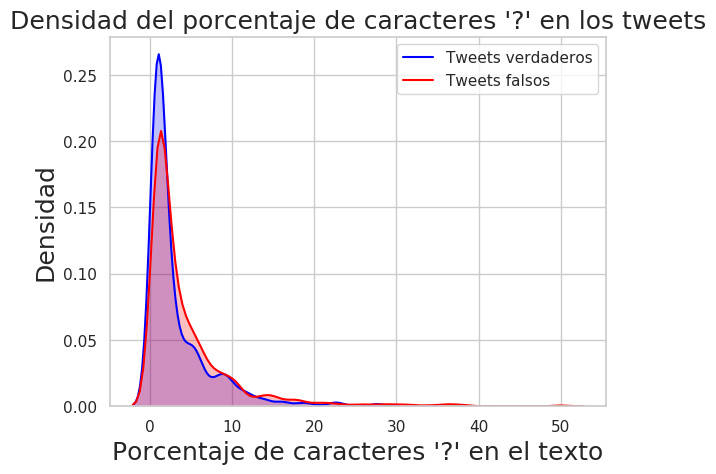

In [124]:
plot_tweets_question = sns.kdeplot(text_target_len_question[text_target_len_question['target'] == 1]["question_percentage"],color="blue",label='Tweets verdaderos',
                 shade=True)
plot_tweets_question = sns.kdeplot(text_target_len_question[text_target_len_question['target'] == 0]["question_percentage"],color="red",label='Tweets falsos',
                 shade=True)

plot_tweets_question.set_title("Densidad del porcentaje de caracteres '?' en los tweets", fontsize=18)
plot_tweets_question.set_xlabel("Porcentaje de caracteres '?' en el texto",fontsize=18)
plot_tweets_question.set_ylabel("Densidad", fontsize=18)

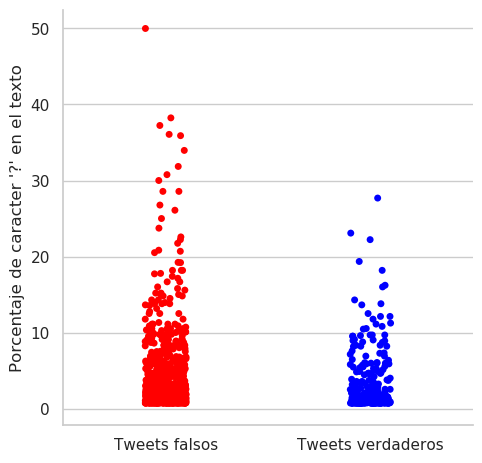

In [125]:
z = sns.catplot(x="target", y="question_percentage", data=text_target_len_question, palette = ["red","blue"]);
z.set_xticklabels(labels=['Tweets falsos','Tweets verdaderos'])
z.set_axis_labels("", "Porcentaje de caracter '?' en el texto")

In [126]:
text_target_len_question[text_target_len_question['target'] == 0].nlargest(1,"question_percentage")["text"]

830    the best thing at DQ is the cotton candy blizzard ??????????????????????????????????????????????????
Name: text, dtype: object

In [127]:
text_target_len_question[text_target_len_question['target'] == 1].nlargest(1,"question_percentage")["text"]

6702    #thunder outside my house this afternoon #gawx ??????????????????
Name: text, dtype: object